In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# load dataset
transactions = pd.read_csv("Data/creditcard.csv")
transactions.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
#split dataset in features and target variable
X = transactions.drop(['Class'], axis=1) # Features
y = transactions.Class # Target variable

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training and 20% test

In [63]:
# 'C': 100, 'penalty': 'l1', 'solver': 'liblinear'
model = LogisticRegression(solver='liblinear', C=100, penalty='l1', random_state=0)

# Train
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [7]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred) 

<AxesSubplot:>

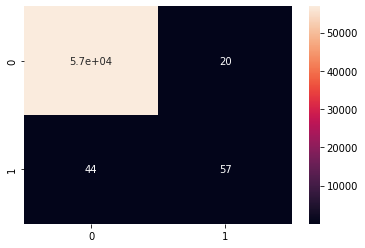

In [8]:
sns.heatmap(cm, annot=True)

<AxesSubplot:>

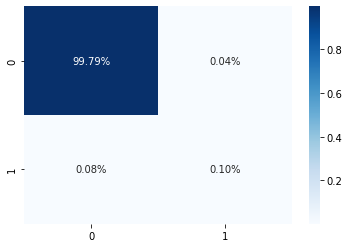

In [9]:
import numpy as np
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 0.87
Macro Recall: 0.78
Macro F1-score: 0.82

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.74      0.56      0.64       101

    accuracy                           1.00     56962
   macro avg       0.87      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [5]:
TP, FN, FP, TN = 0, 0, 0, 0

def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([[TP, FN], [FP, TN]])

def getTotalAmountFalseNegative(df):
    df = df[df.case == 'false negative'] 
    totalAmount = 0
    for index, row in df.iterrows():
        totalAmount += row.Amount
    return totalAmount

def total_cost(cm, X_test, y_test, y_pred):
    for cls in range(cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, cm).ravel()
        #print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')
    
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')

    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])

    X_test['case'] = labels[y_test * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegative(X_test) + (FP + TP) * Ca
    print('Total cost: ' + str(TotalCost))

In [12]:
total_cost(cm, X_test, y_test, y_pred)

TP: 57, FN: 44, FP: 20, TN: 56841
Total cost: 8950.170000000002


# Undersampling

In [6]:
# Split dataset into training set and test set
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # 80% training and 20% test

In [7]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_us, y_train_us = rus.fit_resample(X_train_us, y_train_us)

In [15]:
model = LogisticRegression(solver='liblinear', random_state=0)

# Train
model_us = model.fit(X_train_us,y_train_us)

#Predict the response for test dataset
y_pred_us = model.predict(X_test_us)

In [16]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_us = confusion_matrix(y_test_us, y_pred_us) 

<AxesSubplot:>

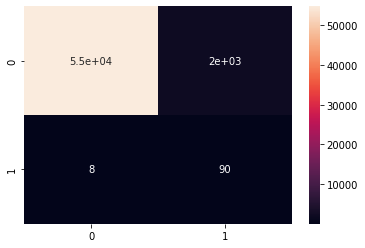

In [17]:
sns.heatmap(cm_us, annot=True)

<AxesSubplot:>

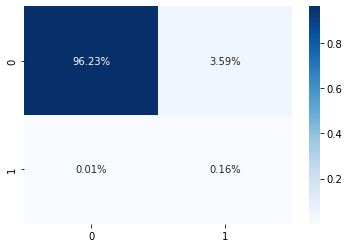

In [18]:
sns.heatmap(cm_us/np.sum(cm_us), annot=True, 
            fmt='.2%', cmap='Blues')

In [19]:
total_cost(cm_us, X_test_us, y_test_us, y_pred_us)

TP: 90, FN: 8, FP: 2047, TN: 54817
Total cost: 11343.61


# Oversampling

In [8]:
from imblearn.over_sampling import SMOTE

# Split dataset into training set and test set
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # 80% training and 20% test

smote_technique = SMOTE(sampling_strategy='minority')
X_smt, y_smt = smote_technique.fit_resample(X_train_smt, y_train_smt)

In [28]:
# 'logisticregression__C': 1e-05, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'
model_smt = LogisticRegression(C=1e-05, penalty='l2',solver='newton-cg')

# Train
model_smt = model_smt.fit(X_smt,y_smt)

#Predict the response for test dataset
y_pred_smt = model_smt.predict(X_test_smt)

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


<AxesSubplot:>

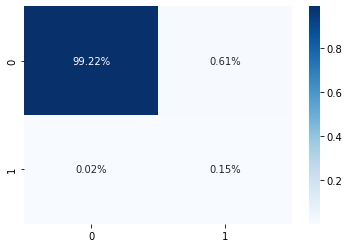

In [29]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_smt = confusion_matrix(y_test_smt, y_pred_smt) 

sns.heatmap(cm_smt/np.sum(cm_smt), annot=True, 
            fmt='.2%', cmap='Blues')

In [30]:
total_cost(cm_smt, X_test_smt, y_test_smt, y_pred_smt)

TP: 87, FN: 11, FP: 345, TN: 56519
Total cost: 3986.5


# Grid search

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def get_x_elements_by_indices(x_train, indices):
    new_df = pd.DataFrame()
    for index in indices:
        try:
            new_df = new_df.append(x_train.iloc[index])
        except:
            print(str(index) + " not found")
    return new_df

def getTotalAmountFalseNegativeMyScorer(df, y_test, y_pred):
    fn_indices = []
    for ((index, row), i) in zip(y_test.items(), range(len(y_pred))):
        if y_pred[i]==0 and row!=y_pred[i]:
            fn_indices.append(index)
    print("No of FN: " + str(len(fn_indices)))
    df = df.iloc[fn_indices]
    totalAmount = 0
    for index, row in df.iterrows():
        totalAmount += row.Amount
    return totalAmount

def my_scorer(y_true, y_pred):
    model_cm = confusion_matrix(y_true, y_pred) 
    
    for cls in range(model_cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, model_cm).ravel() 
        
    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])
    X_test_score = X
    # X_test_score = get_x_elements_by_indices(X_test_score, y_true.index)
    #print(labels[y_true * 2 + y_pred])
    #X_test_score['case'] = labels[y_true * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegativeMyScorer(X_test_score, y_true, y_pred) + (FP + TP) * Ca
    print(TotalCost)
    return TotalCost

from sklearn.metrics import make_scorer
my_func = make_scorer(my_scorer, greater_is_better=False)

#my_scorer(y_test, y_pred)

In [10]:
from sklearn.model_selection import GridSearchCV
# define model
model = LogisticRegression()
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# weights = {0:1.0, 1:25.0}
space['weights'] = [{0:1.0, 1:25.0}, {0:1.0, 1:50.0}, {0:1.0, 1:75.0}, {0:1.0, 1:100.0}, {0:1.0, 1:150.0}]
# define search
#search = GridSearchCV()

In [10]:
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
# search = GridSearchCV(model, space, cv=cv, scoring='f1', n_jobs=-1)
# define search
search = GridSearchCV(model, space, scoring=my_func, cv=cv, verbose=10)

In [12]:
# execute search
#result = search.fit(X_train, y_train)

In [39]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9989554302261862
Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


In [31]:
from sklearn.model_selection import GridSearchCV

solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty  = ['none', 'l1', 'l2', 'elasticnet']
C = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# weights =  [{0:1.0, 1:25.0}, {0:1.0, 1:50.0}, {0:1.0, 1:75.0}, {0:1.0, 1:100.0}, {0:1.0, 1:150.0}]
weights =  [{0:1.0, 1:10.0}, {0:1.0, 1:25.0}]
# Define parameters
param_grid = dict(solver=solver, penalty=penalty, C=C, class_weight=weights)

# Build the gridsearch
lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=param_grid, scoring=my_func, cv = 5, verbose=10)

# Normal Dataset

In [32]:
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5; 1/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 1/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2695.250 total time=  10.1s
[CV 2/5; 1/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 1/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-4422.240 total time=  10.2s
[CV 3/5; 1/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 1/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1947.150 total time=  10.0s
[CV 4/5; 1/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 1/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2328.110 total time=  10.3s
[CV 5/5; 1/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 1/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1772.890 total time=   9.6s
[CV 1/5; 2/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3205.249999999999
[CV 1/5; 2/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3205.250 total time=   1.2s
[CV 2/5; 2/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 19
4423.800000000001
[CV 2/5; 2/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-4423.800 total time=   1.2s
[CV 3/5; 2/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2368.15
[CV 3/5; 2/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2368.150 total time=   1.2s
[CV 4/5; 2/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2771.36
[CV 4/5; 2/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2771.360 total time=   1.2s
[CV 5/5; 2/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 2/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3145.930 total time=   1.2s
[CV 1/5; 3/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 1/5; 3/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 3/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 2/5; 3/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 3/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 3/5; 3/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 3/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 4/5; 3/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, scor

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 56
6672.549999999998
[CV 1/5; 7/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-6672.550 total time=  10.8s
[CV 2/5; 7/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


No of FN: 50
8835.949999999999
[CV 2/5; 7/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-8835.950 total time=  10.5s
[CV 3/5; 7/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 53
4824.650000000001
[CV 3/5; 7/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-4824.650 total time=  10.5s
[CV 4/5; 7/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 52
4931.899999999999
[CV 4/5; 7/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-4931.900 total time=  10.6s
[CV 5/5; 7/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 57
12747.660000000002
[CV 5/5; 7/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-12747.660 total time=  13.2s
[CV 1/5; 8/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs
No of FN: 44
6476.509999999999
[CV 1/5; 8/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-6476.510 total time=   0.8s
[CV 2/5; 8/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs
No of FN: 48
9096.649999999998
[CV 2/5; 8/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-9096.650 total time=   0.8s
[CV 3/5; 8/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs
No of FN: 48
5357.040000000002
[CV 3/5; 8/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-5357.040 total time=   1.0s
[CV 4/5; 8/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs
No of FN: 48
5772.32999999

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 54
13278.95
[CV 5/5; 8/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-13278.950 total time=   1.5s
[CV 1/5; 9/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 44
6446.509999999999
[CV 1/5; 9/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-6446.510 total time=   1.5s
[CV 2/5; 9/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 48
9026.649999999998
[CV 2/5; 9/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-9026.650 total time=   1.7s
[CV 3/5; 9/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 48
5327.040000000002
[CV 3/5; 9/192] END C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-5327.040 total time=   1.7s
[CV 4/5; 9/192] START C=1e-05, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 47

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 13/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2780.250 total time=  13.7s
[CV 2/5; 13/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 16
3955.1800000000003
[CV 2/5; 13/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-3955.180 total time=  13.7s
[CV 3/5; 13/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 11
2070.16
[CV 3/5; 13/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2070.160 total time=  13.9s
[CV 4/5; 13/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2328.1200000000003
[CV 4/5; 13/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2328.120 total time=  13.7s
[CV 5/5; 13/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
1775.1
[CV 5/5; 13/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-1775.100 total time=  13.3s
[CV 1/5; 14/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3185.249999999999
[CV 1/5; 14/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-3185.250 total time=   1.5s
[CV 2/5; 14/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4698.800000000001
[CV 2/5; 14/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-4698.800 total time=   1.3s
[CV 3/5; 14/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2912.15
[CV 3/5; 14/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2912.150 total time=   1.3s
[CV 4/5; 14/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2979.1400000000003
[CV 4/5; 14/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2979.140 total time=   1.3s
[CV 5/5; 14/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2737.89
[CV 5/5; 14/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2737.890 total time=   1.2s
[CV 1/5; 15/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 1/5; 15/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 15/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 2/5; 15/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 15/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 3/5; 15/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 15/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 4/5; 15/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 39
5283.95
[CV 1/5; 19/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-5283.950 total time=  13.4s
[CV 2/5; 19/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 39
7587.500000000001
[CV 2/5; 19/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-7587.500 total time=  13.7s
[CV 3/5; 19/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 33
3377.66
[CV 3/5; 19/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-3377.660 total time=  13.2s
[CV 4/5; 19/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 32
4125.24
[CV 4/5; 19/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-4125.240 total time=  14.8s
[CV 5/5; 19/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 44
10757.950000000003
[CV 5/5; 19/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-10757.950 total time=  14.2s
[CV 1/5; 20/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 29
5214.21
[CV 1/5; 20/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-5214.210 total time=   1.5s
[CV 2/5; 20/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 37
8389.869999999999
[CV 2/5; 20/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-8389.870 total time=   1.0s
[CV 3/5; 20/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 37
4506.879999999999
[CV 3/5; 20/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-4506.880 total time=   0.7s
[CV 4/5; 20/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 37
4473.879999999999
[CV 4/5; 20/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-4473.880 total time=   1.0s
[CV 5/5; 20/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 42
10548.660000000002
[CV 5/5; 20/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-10548.660 total time=   1.5s
[CV 1/5; 21/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 32
4073.8799999999997
[CV 1/5; 21/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-4073.880 total time=   1.6s
[CV 2/5; 21/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 37
8389.869999999999
[CV 2/5; 21/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-8389.870 total time=   1.4s
[CV 3/5; 21/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 35
4335.199999999999
[CV 3/5; 21/192] END C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-4335.200 total time=   1.5s
[CV 4/5; 21/192] START C=1e-05, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lib

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 25/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2695.250 total time=  13.1s
[CV 2/5; 25/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 25/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-4422.240 total time=  13.1s
[CV 3/5; 25/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 25/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1947.150 total time=  12.9s
[CV 4/5; 25/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 25/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2328.110 total time=  13.2s
[CV 5/5; 25/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 25/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1772.890 total time=  12.3s
[CV 1/5; 26/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3205.249999999999
[CV 1/5; 26/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3205.250 total time=   1.5s
[CV 2/5; 26/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 19
4423.800000000001
[CV 2/5; 26/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-4423.800 total time=   1.6s
[CV 3/5; 26/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2368.15
[CV 3/5; 26/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2368.150 total time=   1.6s
[CV 4/5; 26/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2771.36
[CV 4/5; 26/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2771.360 total time=   1.5s
[CV 5/5; 26/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 26/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3145.930 total time=   1.5s
[CV 1/5; 27/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 1/5; 27/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 27/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 2/5; 27/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 27/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 3/5; 27/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 27/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 4/5; 27/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solve

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 27
3369.319999999999
[CV 1/5; 31/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-3369.320 total time=  14.2s
[CV 2/5; 31/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 32
7095.2300000000005
[CV 2/5; 31/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-7095.230 total time=  13.5s
[CV 3/5; 31/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 27
2657.9700000000003
[CV 3/5; 31/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2657.970 total time=  13.2s
[CV 4/5; 31/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 20
2485.2400000000002
[CV 4/5; 31/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2485.240 total time=  13.0s
[CV 5/5; 31/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 32
7048.58
[CV 5/5; 31/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-7048.580 total time=  13.7s
[CV 1/5; 32/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs
No of FN: 26
3692.79
[CV 1/5; 32/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-3692.790 total time=   1.1s
[CV 2/5; 32/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 29
7546.17
[CV 2/5; 32/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-7546.170 total time=   1.6s
[CV 3/5; 32/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 22
4122.01
[CV 3/5; 32/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-4122.010 total time=   1.6s
[CV 4/5; 32/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs
No of FN: 28
4088.5799999999995
[CV 4/5; 32/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-4088.580 total time=   1.7s
[CV 5/5; 32/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 38
10519.230000000001
[CV 5/5; 32/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-10519.230 total time=   1.6s
[CV 1/5; 33/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 24
3138.56
[CV 1/5; 33/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-3138.560 total time=   1.6s
[CV 2/5; 33/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 25
5350.300000000001
[CV 2/5; 33/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-5350.300 total time=   1.8s
[CV 3/5; 33/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 22
4172.01
[CV 3/5; 33/192] END C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-4172.010 total time=   1.7s
[CV 4/5; 33/192] START C=0.0001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of 

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 37/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2780.250 total time=  14.1s
[CV 2/5; 37/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 16
3955.1800000000003
[CV 2/5; 37/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-3955.180 total time=  14.2s
[CV 3/5; 37/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 11
2070.16
[CV 3/5; 37/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2070.160 total time=  14.7s
[CV 4/5; 37/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2328.1200000000003
[CV 4/5; 37/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2328.120 total time=  15.1s
[CV 5/5; 37/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
1775.1
[CV 5/5; 37/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-1775.100 total time=  13.9s
[CV 1/5; 38/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3185.249999999999
[CV 1/5; 38/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-3185.250 total time=   1.6s
[CV 2/5; 38/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4698.800000000001
[CV 2/5; 38/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-4698.800 total time=   1.5s
[CV 3/5; 38/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2912.15
[CV 3/5; 38/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2912.150 total time=   1.7s
[CV 4/5; 38/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2979.1400000000003
[CV 4/5; 38/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2979.140 total time=   1.7s
[CV 5/5; 38/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2737.89
[CV 5/5; 38/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2737.890 total time=   1.6s
[CV 1/5; 39/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 1/5; 39/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 39/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 2/5; 39/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 39/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 3/5; 39/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 39/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 4/5; 39/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
3040.249999999999
[CV 1/5; 43/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-3040.250 total time=  14.2s
[CV 2/5; 43/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 23
4754.750000000001
[CV 2/5; 43/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-4754.750 total time=  14.4s
[CV 3/5; 43/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 13
1948.15
[CV 3/5; 43/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-1948.150 total time=  14.5s
[CV 4/5; 43/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 16
2211.34
[CV 4/5; 43/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2211.340 total time=  15.1s
[CV 5/5; 43/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 17
1772.9299999999998
[CV 5/5; 43/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-1772.930 total time=  14.8s
[CV 1/5; 44/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 17
3271.2999999999993
[CV 1/5; 44/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-3271.300 total time=   1.2s
[CV 2/5; 44/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 19
4523.800000000001
[CV 2/5; 44/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-4523.800 total time=   1.5s
[CV 3/5; 44/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2913.66
[CV 3/5; 44/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2913.660 total time=   1.6s
[CV 4/5; 44/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 19
3024.71
[CV 4/5; 44/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-3024.710 total time=   0.8s
[CV 5/5; 44/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 28
6449.5
[CV 5/5; 44/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-6449.500 total time=   1.7s
[CV 1/5; 45/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 16
3220.2999999999993
[CV 1/5; 45/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-3220.300 total time=   2.0s
[CV 2/5; 45/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 19
4483.800000000001
[CV 2/5; 45/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-4483.800 total time=   2.0s
[CV 3/5; 45/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 17
3129.66
[CV 3/5; 45/192] END C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-3129.660 total time=   2.0s
[CV 4/5; 45/192] START C=0.0001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 49/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2695.250 total time=  14.0s
[CV 2/5; 49/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 49/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-4422.240 total time=  13.5s
[CV 3/5; 49/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 49/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1947.150 total time=  13.4s
[CV 4/5; 49/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 49/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2328.110 total time=  13.5s
[CV 5/5; 49/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 49/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1772.890 total time=  12.0s
[CV 1/5; 50/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3205.249999999999
[CV 1/5; 50/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3205.250 total time=   1.6s
[CV 2/5; 50/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 19
4423.800000000001
[CV 2/5; 50/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-4423.800 total time=   1.5s
[CV 3/5; 50/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2368.15
[CV 3/5; 50/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2368.150 total time=   1.6s
[CV 4/5; 50/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2771.36
[CV 4/5; 50/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2771.360 total time=   1.6s
[CV 5/5; 50/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 50/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3145.930 total time=   1.6s
[CV 1/5; 51/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 1/5; 51/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 51/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 2/5; 51/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 51/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 3/5; 51/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 51/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 4/5; 51/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=libline

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
3040.249999999999
[CV 1/5; 55/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-3040.250 total time=  13.9s
[CV 2/5; 55/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 20
4607.270000000001
[CV 2/5; 55/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-4607.270 total time=  13.3s
[CV 3/5; 55/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 13
1948.15
[CV 3/5; 55/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1948.150 total time=  13.6s
[CV 4/5; 55/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 16
2201.34
[CV 4/5; 55/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2201.340 total time=  13.9s
[CV 5/5; 55/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 17
1777.9299999999998
[CV 5/5; 55/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1777.930 total time=  12.6s
[CV 1/5; 56/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs
No of FN: 15
2949.539999999999
[CV 1/5; 56/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2949.540 total time=   1.2s
[CV 2/5; 56/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 20
4485.02
[CV 2/5; 56/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-4485.020 total time=   1.5s
[CV 3/5; 56/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2194.66
[CV 3/5; 56/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2194.660 total time=   1.6s
[CV 4/5; 56/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs
No of FN: 19
2979.71
[CV 4/5; 56/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2979.710 total time=   0.9s
[CV 5/5; 56/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 22
5820.76
[CV 5/5; 56/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-5820.760 total time=   1.5s
[CV 1/5; 57/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 16
2805.2999999999993
[CV 1/5; 57/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-2805.300 total time=   2.4s
[CV 2/5; 57/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 19
4208.800000000001
[CV 2/5; 57/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-4208.800 total time=   2.3s
[CV 3/5; 57/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 14
2078.66
[CV 3/5; 57/192] END C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-2078.660 total time=   2.4s
[CV 4/5; 57/192] START C=0.001, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 16
22

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 61/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2780.250 total time=  13.6s
[CV 2/5; 61/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 16
3955.1800000000003
[CV 2/5; 61/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-3955.180 total time=  13.5s
[CV 3/5; 61/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 11
2070.16
[CV 3/5; 61/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2070.160 total time=  14.1s
[CV 4/5; 61/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2328.1200000000003
[CV 4/5; 61/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2328.120 total time=  13.6s
[CV 5/5; 61/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
1775.1
[CV 5/5; 61/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-1775.100 total time=  13.1s
[CV 1/5; 62/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3185.249999999999
[CV 1/5; 62/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-3185.250 total time=   1.5s
[CV 2/5; 62/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4698.800000000001
[CV 2/5; 62/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-4698.800 total time=   1.5s
[CV 3/5; 62/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2912.15
[CV 3/5; 62/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2912.150 total time=   1.5s
[CV 4/5; 62/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2979.1400000000003
[CV 4/5; 62/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2979.140 total time=   1.6s
[CV 5/5; 62/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2737.89
[CV 5/5; 62/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2737.890 total time=   1.5s
[CV 1/5; 63/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 1/5; 63/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 63/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 2/5; 63/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 63/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 3/5; 63/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 63/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 4/5; 63/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2740.249999999999
[CV 1/5; 67/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2740.250 total time=  13.7s
[CV 2/5; 67/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 18
4442.24
[CV 2/5; 67/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-4442.240 total time=  13.7s
[CV 3/5; 67/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 12
2027.15
[CV 3/5; 67/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2027.150 total time=  13.7s
[CV 4/5; 67/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2258.1200000000003
[CV 4/5; 67/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2258.120 total time=  13.6s
[CV 5/5; 67/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 13
1710.1
[CV 5/5; 67/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-1710.100 total time=  13.2s
[CV 1/5; 68/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 16
3240.539999999999
[CV 1/5; 68/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-3240.540 total time=   1.6s
[CV 2/5; 68/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 18
4718.800000000001
[CV 2/5; 68/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-4718.800 total time=   1.2s
[CV 3/5; 68/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 12
2757.15
[CV 3/5; 68/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2757.150 total time=   1.4s
[CV 4/5; 68/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 12
2849.58
[CV 4/5; 68/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2849.580 total time=   1.5s
[CV 5/5; 68/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 21
8349.17
[CV 5/5; 68/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-8349.170 total time=   1.6s
[CV 1/5; 69/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 15
3064.539999999999
[CV 1/5; 69/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-3064.540 total time=   2.9s
[CV 2/5; 69/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 18
4343.800000000001
[CV 2/5; 69/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-4343.800 total time=   2.2s
[CV 3/5; 69/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 13
2278.15
[CV 3/5; 69/192] END C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-2278.150 total time=   2.5s
[CV 4/5; 69/192] START C=0.001, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 14
250

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 73/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2695.250 total time=  12.5s
[CV 2/5; 73/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 73/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-4422.240 total time=  12.6s
[CV 3/5; 73/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 73/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1947.150 total time=  12.6s
[CV 4/5; 73/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 73/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2328.110 total time=  12.8s
[CV 5/5; 73/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 73/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1772.890 total time=  10.3s
[CV 1/5; 74/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3205.249999999999
[CV 1/5; 74/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3205.250 total time=   1.3s
[CV 2/5; 74/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 19
4423.800000000001
[CV 2/5; 74/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-4423.800 total time=   1.3s
[CV 3/5; 74/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2368.15
[CV 3/5; 74/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2368.150 total time=   1.3s
[CV 4/5; 74/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2771.36
[CV 4/5; 74/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2771.360 total time=   1.3s
[CV 5/5; 74/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 74/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3145.930 total time=   1.3s
[CV 1/5; 75/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 1/5; 75/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 75/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 2/5; 75/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 75/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 3/5; 75/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 75/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 4/5; 75/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, scor

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2690.249999999999
[CV 1/5; 79/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2690.250 total time=  10.0s
[CV 2/5; 79/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 19
4418.0
[CV 2/5; 79/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-4418.000 total time=  12.7s
[CV 3/5; 79/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 12
1952.15
[CV 3/5; 79/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1952.150 total time=  16.2s
[CV 4/5; 79/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2223.1200000000003
[CV 4/5; 79/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2223.120 total time=  15.6s
[CV 5/5; 79/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 79/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1772.890 total time=  15.5s
[CV 1/5; 80/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
3059.539999999999
[CV 1/5; 80/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-3059.540 total time=   1.9s
[CV 2/5; 80/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 19
4398.800000000001
[CV 2/5; 80/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-4398.800 total time=   1.9s
[CV 3/5; 80/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs
No of FN: 13
2293.15
[CV 3/5; 80/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2293.150 total time=   1.6s
[CV 4/5; 80/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
2508.6000000000004
[CV 4/5; 80/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2508.600 total time=   2.1s
[CV 5/5; 80/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 20
3145.83
[CV 5/5; 80/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-3145.830 total time=   1.8s
[CV 1/5; 81/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 15
2679.539999999999
[CV 1/5; 81/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-2679.540 total time=   4.0s
[CV 2/5; 81/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 18
4128.800000000001
[CV 2/5; 81/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-4128.800 total time=   4.4s
[CV 3/5; 81/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 13
2083.15
[CV 3/5; 81/192] END C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-2083.150 total time=   3.3s
[CV 4/5; 81/192] START C=0.01, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 17
2341.330000

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 85/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2780.250 total time=  19.0s
[CV 2/5; 85/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 16
3955.1800000000003
[CV 2/5; 85/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-3955.180 total time=  18.0s
[CV 3/5; 85/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 11
2070.16
[CV 3/5; 85/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2070.160 total time=  18.5s
[CV 4/5; 85/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2328.1200000000003
[CV 4/5; 85/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2328.120 total time=  17.0s
[CV 5/5; 85/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
1775.1
[CV 5/5; 85/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-1775.100 total time=  17.1s
[CV 1/5; 86/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3185.249999999999
[CV 1/5; 86/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-3185.250 total time=   2.0s
[CV 2/5; 86/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4698.800000000001
[CV 2/5; 86/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-4698.800 total time=   2.1s
[CV 3/5; 86/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2912.15
[CV 3/5; 86/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2912.150 total time=   2.0s
[CV 4/5; 86/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2979.1400000000003
[CV 4/5; 86/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2979.140 total time=   2.1s
[CV 5/5; 86/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2737.89
[CV 5/5; 86/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2737.890 total time=   2.0s
[CV 1/5; 87/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 1/5; 87/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 87/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 2/5; 87/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 87/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 3/5; 87/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 87/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 4/5; 87/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2775.249999999999
[CV 1/5; 91/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2775.250 total time=  17.9s
[CV 2/5; 91/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 16
3925.1800000000003
[CV 2/5; 91/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-3925.180 total time=  20.1s
[CV 3/5; 91/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 12
2072.15
[CV 3/5; 91/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2072.150 total time=  18.7s
[CV 4/5; 91/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2308.1200000000003
[CV 4/5; 91/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2308.120 total time=  17.9s
[CV 5/5; 91/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 13
1760.1
[CV 5/5; 91/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-1760.100 total time=  16.6s
[CV 1/5; 92/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 14
3625.249999999999
[CV 1/5; 92/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-3625.250 total time=   1.7s
[CV 2/5; 92/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 17
4832.800000000001
[CV 2/5; 92/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-4832.800 total time=   1.6s
[CV 3/5; 92/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 12
2882.15
[CV 3/5; 92/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2882.150 total time=   1.8s
[CV 4/5; 92/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 11
3132.36
[CV 4/5; 92/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-3132.360 total time=   1.7s
[CV 5/5; 92/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 15
2712.89
[CV 5/5; 92/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2712.890 total time=   1.7s
[CV 1/5; 93/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 14
2885.249999999999
[CV 1/5; 93/192] END C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-2885.250 total time=   5.2s
[CV 2/5; 93/192] START C=0.01, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 18
4293.800000000001
[CV 2/5; 93/192] EN

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 97/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2695.250 total time=  16.9s
[CV 2/5; 97/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 97/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-4422.240 total time=  16.7s
[CV 3/5; 97/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 97/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1947.150 total time=  16.3s
[CV 4/5; 97/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 97/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2328.110 total time=  17.6s
[CV 5/5; 97/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 97/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1772.890 total time=  16.6s
[CV 1/5; 98/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3205.249999999999
[CV 1/5; 98/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3205.250 total time=   2.1s
[CV 2/5; 98/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 19
4423.800000000001
[CV 2/5; 98/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-4423.800 total time=   1.8s
[CV 3/5; 98/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2368.15
[CV 3/5; 98/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2368.150 total time=   2.0s
[CV 4/5; 98/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2771.36
[CV 4/5; 98/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2771.360 total time=   2.0s
[CV 5/5; 98/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 98/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3145.930 total time=   1.9s
[CV 1/5; 99/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 1/5; 99/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 99/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 2/5; 99/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 99/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 3/5; 99/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 99/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 4/5; 99/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan tot

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 103/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2695.250 total time=  16.7s
[CV 2/5; 103/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 103/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-4422.240 total time=  16.5s
[CV 3/5; 103/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 12
1957.15
[CV 3/5; 103/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1957.150 total time=  16.1s
[CV 4/5; 103/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 103/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2328.110 total time=  15.4s
[CV 5/5; 103/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 103/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1772.890 total time=  15.0s
[CV 1/5; 104/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
3179.539999999999
[CV 1/5; 104/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-3179.540 total time=   1.9s
[CV 2/5; 104/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 19
4328.800000000001
[CV 2/5; 104/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-4328.800 total time=   1.8s
[CV 3/5; 104/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 14
2198.66
[CV 3/5; 104/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2198.660 total time=   1.8s
[CV 4/5; 104/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 14
2491.58
[CV 4/5; 104/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2491.580 total time=   2.0s
[CV 5/5; 104/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 104/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-3145.930 total time=   2.0s
[CV 1/5; 105/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 15
2709.539999999999
[CV 1/5; 105/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-2709.540 total time=   4.0s
[CV 2/5; 105/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 18
4113.800000000001
[CV 2/5; 105/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-4113.800 total time=   5.6s
[CV 3/5; 105/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 13
2038.15
[CV 3/5; 105/192] END C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-2038.150 total time=   3.7s
[CV 4/5; 105/192] START C=0.1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 17


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 109/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2780.250 total time=  15.9s
[CV 2/5; 109/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 16
3955.1800000000003
[CV 2/5; 109/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-3955.180 total time=  16.3s
[CV 3/5; 109/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 11
2070.16
[CV 3/5; 109/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2070.160 total time=  15.7s
[CV 4/5; 109/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2328.1200000000003
[CV 4/5; 109/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2328.120 total time=  15.5s
[CV 5/5; 109/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
1775.1
[CV 5/5; 109/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-1775.100 total time=  14.8s
[CV 1/5; 110/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3185.249999999999
[CV 1/5; 110/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-3185.250 total time=   1.9s
[CV 2/5; 110/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4698.800000000001
[CV 2/5; 110/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-4698.800 total time=   1.8s
[CV 3/5; 110/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2912.15
[CV 3/5; 110/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2912.150 total time=   1.8s
[CV 4/5; 110/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2979.1400000000003
[CV 4/5; 110/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2979.140 total time=   1.7s
[CV 5/5; 110/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2737.89
[CV 5/5; 110/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2737.890 total time=   1.6s
[CV 1/5; 111/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 1/5; 111/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 111/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 2/5; 111/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 111/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 3/5; 111/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 111/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 4/5; 111/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 115/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2780.250 total time=  15.9s
[CV 2/5; 115/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 16
3950.1800000000003
[CV 2/5; 115/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-3950.180 total time=  14.8s
[CV 3/5; 115/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 11
2075.16
[CV 3/5; 115/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2075.160 total time=  15.4s
[CV 4/5; 115/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2323.1200000000003
[CV 4/5; 115/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2323.120 total time=  14.6s
[CV 5/5; 115/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 13
1765.1
[CV 5/5; 115/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-1765.100 total time=  14.6s
[CV 1/5; 116/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 14
3660.249999999999
[CV 1/5; 116/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-3660.250 total time=   1.4s
[CV 2/5; 116/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 17
4852.800000000001
[CV 2/5; 116/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-4852.800 total time=   1.5s
[CV 3/5; 116/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 12
2897.15
[CV 3/5; 116/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2897.150 total time=   1.6s
[CV 4/5; 116/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 10
2998.15
[CV 4/5; 116/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2998.150 total time=   1.6s
[CV 5/5; 116/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2727.89
[CV 5/5; 116/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2727.890 total time=   1.8s
[CV 1/5; 117/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 14
2960.249999999999
[CV 1/5; 117/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-2960.250 total time=   4.0s
[CV 2/5; 117/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 17
4313.040000000001
[CV 2/5; 117/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-4313.040 total time=   3.9s
[CV 3/5; 117/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 11
2145.16
[CV 3/5; 117/192] END C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-2145.160 total time=   3.7s
[CV 4/5; 117/192] START C=0.1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 12
2421.120000

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 121/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2695.250 total time=  14.0s
[CV 2/5; 121/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 121/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-4422.240 total time=  13.9s
[CV 3/5; 121/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 121/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1947.150 total time=  14.3s
[CV 4/5; 121/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 121/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2328.110 total time=  13.9s
[CV 5/5; 121/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 121/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1772.890 total time=  13.3s
[CV 1/5; 122/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 14
3205.249999999999
[CV 1/5; 122/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3205.250 total time=   1.7s
[CV 2/5; 122/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 19
4423.800000000001
[CV 2/5; 122/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-4423.800 total time=   1.7s
[CV 3/5; 122/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 13
2368.15
[CV 3/5; 122/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2368.150 total time=   1.5s
[CV 4/5; 122/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 13
2771.36
[CV 4/5; 122/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2771.360 total time=   1.7s
[CV 5/5; 122/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 122/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3145.930 total time=   1.7s
[CV 1/5; 123/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 1/5; 123/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 123/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 2/5; 123/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 123/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 3/5; 123/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 123/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 4/5; 123/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time= 

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 127/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2695.250 total time=  12.6s
[CV 2/5; 127/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 127/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-4422.240 total time=  14.2s
[CV 3/5; 127/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 127/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1947.150 total time=  14.4s
[CV 4/5; 127/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 127/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2328.110 total time=  15.2s
[CV 5/5; 127/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 127/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1772.890 total time=  14.1s
[CV 1/5; 128/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2939.539999999999
[CV 1/5; 128/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2939.540 total time=   1.9s
[CV 2/5; 128/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 19
4348.800000000001
[CV 2/5; 128/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-4348.800 total time=   2.0s
[CV 3/5; 128/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 13
2363.15
[CV 3/5; 128/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2363.150 total time=   1.6s
[CV 4/5; 128/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 14
2616.58
[CV 4/5; 128/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2616.580 total time=   1.8s
[CV 5/5; 128/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 128/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-3145.930 total time=   1.9s
[CV 1/5; 129/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 17
3125.539999999999
[CV 1/5; 129/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-3125.540 total time=   3.7s
[CV 2/5; 129/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 18
4108.800000000001
[CV 2/5; 129/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-4108.800 total time=   4.5s
[CV 3/5; 129/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 13
2043.15
[CV 3/5; 129/192] END C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-2043.150 total time=   3.7s
[CV 4/5; 129/192] START C=1, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 17
2268.61000000000

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 133/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2780.250 total time=  16.5s
[CV 2/5; 133/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 16
3955.1800000000003
[CV 2/5; 133/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-3955.180 total time=  15.8s
[CV 3/5; 133/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 11
2070.16
[CV 3/5; 133/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2070.160 total time=  17.0s
[CV 4/5; 133/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2328.1200000000003
[CV 4/5; 133/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2328.120 total time=  17.0s
[CV 5/5; 133/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 13
1775.1
[CV 5/5; 133/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-1775.100 total time=  15.4s
[CV 1/5; 134/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 14
3185.249999999999
[CV 1/5; 134/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-3185.250 total time=   2.2s
[CV 2/5; 134/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
4698.800000000001
[CV 2/5; 134/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-4698.800 total time=   1.8s
[CV 3/5; 134/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 12
2912.15
[CV 3/5; 134/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2912.150 total time=   1.8s
[CV 4/5; 134/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 12
2979.1400000000003
[CV 4/5; 134/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2979.140 total time=   1.8s
[CV 5/5; 134/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2737.89
[CV 5/5; 134/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2737.890 total time=   1.9s
[CV 1/5; 135/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 1/5; 135/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 135/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 2/5; 135/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 135/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 3/5; 135/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 135/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 4/5; 135/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 139/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2780.250 total time=  15.4s
[CV 2/5; 139/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 16
3955.1800000000003
[CV 2/5; 139/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-3955.180 total time=  17.3s
[CV 3/5; 139/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 11
2075.16
[CV 3/5; 139/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2075.160 total time=  17.2s
[CV 4/5; 139/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2338.1200000000003
[CV 4/5; 139/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2338.120 total time=  16.6s
[CV 5/5; 139/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 12
1784.1
[CV 5/5; 139/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-1784.100 total time=  16.5s
[CV 1/5; 140/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 14
3520.249999999999
[CV 1/5; 140/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-3520.250 total time=   1.7s
[CV 2/5; 140/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 17
4842.800000000001
[CV 2/5; 140/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-4842.800 total time=   1.9s
[CV 3/5; 140/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 12
2832.15
[CV 3/5; 140/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2832.150 total time=   2.0s
[CV 4/5; 140/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 11
2874.15
[CV 4/5; 140/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2874.150 total time=   2.3s
[CV 5/5; 140/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2707.89
[CV 5/5; 140/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2707.890 total time=   1.7s
[CV 1/5; 141/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 14
2960.249999999999
[CV 1/5; 141/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-2960.250 total time=   3.8s
[CV 2/5; 141/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 17
4313.040000000001
[CV 2/5; 141/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-4313.040 total time=   4.1s
[CV 3/5; 141/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 11
2145.16
[CV 3/5; 141/192] END C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-2145.160 total time=   2.8s
[CV 4/5; 141/192] START C=1, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 12
2397.9100000000003
[CV 4/5;

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 145/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2695.250 total time=  16.6s
[CV 2/5; 145/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 145/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-4422.240 total time=  16.7s
[CV 3/5; 145/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 145/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1947.150 total time=  17.3s
[CV 4/5; 145/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 145/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2328.110 total time=  16.3s
[CV 5/5; 145/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 145/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1772.890 total time=  15.1s
[CV 1/5; 146/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3205.249999999999
[CV 1/5; 146/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3205.250 total time=   1.9s
[CV 2/5; 146/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 19
4423.800000000001
[CV 2/5; 146/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-4423.800 total time=   2.1s
[CV 3/5; 146/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2368.15
[CV 3/5; 146/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2368.150 total time=   2.0s
[CV 4/5; 146/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2771.36
[CV 4/5; 146/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2771.360 total time=   2.0s
[CV 5/5; 146/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 146/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3145.930 total time=   1.7s
[CV 1/5; 147/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 1/5; 147/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 147/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 2/5; 147/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 147/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 3/5; 147/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 147/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 4/5; 147/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan tot

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 151/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2695.250 total time=  14.8s
[CV 2/5; 151/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 151/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-4422.240 total time=  15.5s
[CV 3/5; 151/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 151/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1947.150 total time=  15.2s
[CV 4/5; 151/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 151/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2328.110 total time=  15.8s
[CV 5/5; 151/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 16
1768.8899999999999
[CV 5/5; 151/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1768.890 total time=  13.6s
[CV 1/5; 152/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2939.539999999999
[CV 1/5; 152/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2939.540 total time=   1.7s
[CV 2/5; 152/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 19
4418.800000000001
[CV 2/5; 152/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-4418.800 total time=   2.1s
[CV 3/5; 152/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 13
2338.15
[CV 3/5; 152/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2338.150 total time=   1.9s
[CV 4/5; 152/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 17
2723.8300000000004
[CV 4/5; 152/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2723.830 total time=   1.8s
[CV 5/5; 152/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 152/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-3145.930 total time=   1.6s
[CV 1/5; 153/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 17
3125.539999999999
[CV 1/5; 153/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-3125.540 total time=   3.7s
[CV 2/5; 153/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 18
4108.800000000001
[CV 2/5; 153/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-4108.800 total time=   6.5s
[CV 3/5; 153/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 13
2043.15
[CV 3/5; 153/192] END C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-2043.150 total time=   3.8s
[CV 4/5; 153/192] START C=10, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 17
2268.610

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 157/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2780.250 total time=  16.9s
[CV 2/5; 157/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 16
3955.1800000000003
[CV 2/5; 157/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-3955.180 total time=  17.0s
[CV 3/5; 157/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 11
2070.16
[CV 3/5; 157/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2070.160 total time=  16.3s
[CV 4/5; 157/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2328.1200000000003
[CV 4/5; 157/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2328.120 total time=  16.4s
[CV 5/5; 157/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
1775.1
[CV 5/5; 157/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-1775.100 total time=  15.4s
[CV 1/5; 158/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3185.249999999999
[CV 1/5; 158/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-3185.250 total time=   1.9s
[CV 2/5; 158/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4698.800000000001
[CV 2/5; 158/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-4698.800 total time=   2.0s
[CV 3/5; 158/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2912.15
[CV 3/5; 158/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2912.150 total time=   1.6s
[CV 4/5; 158/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2979.1400000000003
[CV 4/5; 158/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2979.140 total time=   1.9s
[CV 5/5; 158/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2737.89
[CV 5/5; 158/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2737.890 total time=   1.8s
[CV 1/5; 159/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 1/5; 159/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 159/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 2/5; 159/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 159/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 3/5; 159/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 159/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 4/5; 159/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 163/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2780.250 total time=  15.1s
[CV 2/5; 163/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 17
4264.38
[CV 2/5; 163/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-4264.380 total time=  14.0s
[CV 3/5; 163/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 11
2080.16
[CV 3/5; 163/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2080.160 total time=  15.3s
[CV 4/5; 163/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2333.1200000000003
[CV 4/5; 163/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2333.120 total time=  16.3s
[CV 5/5; 163/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 13
1765.1
[CV 5/5; 163/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-1765.100 total time=  15.9s
[CV 1/5; 164/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 14
3660.249999999999
[CV 1/5; 164/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-3660.250 total time=   1.5s
[CV 2/5; 164/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 17
4847.800000000001
[CV 2/5; 164/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-4847.800 total time=   1.3s
[CV 3/5; 164/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 12
2897.15
[CV 3/5; 164/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2897.150 total time=   1.5s
[CV 4/5; 164/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 11
2879.15
[CV 4/5; 164/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2879.150 total time=   1.8s
[CV 5/5; 164/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 15
2737.89
[CV 5/5; 164/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2737.890 total time=   1.7s
[CV 1/5; 165/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 14
2935.249999999999
[CV 1/5; 165/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-2935.250 total time=   3.1s
[CV 2/5; 165/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 17
4303.040000000001
[CV 2/5; 165/192] END C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-4303.040 total time=   3.5s
[CV 3/5; 165/192] START C=10, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 11
2145.16
[CV 3/5; 165/192] E

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 169/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2695.250 total time=  15.1s
[CV 2/5; 169/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 169/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-4422.240 total time=  14.7s
[CV 3/5; 169/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 169/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1947.150 total time=  15.7s
[CV 4/5; 169/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 169/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-2328.110 total time=  15.0s
[CV 5/5; 169/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 169/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=newton-cg;, score=-1772.890 total time=  14.4s
[CV 1/5; 170/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3205.249999999999
[CV 1/5; 170/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3205.250 total time=   1.6s
[CV 2/5; 170/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 19
4423.800000000001
[CV 2/5; 170/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-4423.800 total time=   1.6s
[CV 3/5; 170/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2368.15
[CV 3/5; 170/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2368.150 total time=   1.8s
[CV 4/5; 170/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
2771.36
[CV 4/5; 170/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-2771.360 total time=   1.9s
[CV 5/5; 170/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 170/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=lbfgs;, score=-3145.930 total time=   2.0s
[CV 1/5; 171/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 1/5; 171/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 171/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 2/5; 171/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 171/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 3/5; 171/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 171/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear
[CV 4/5; 171/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=none, solver=liblinear;, scor

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2695.249999999999
[CV 1/5; 175/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2695.250 total time=  15.5s
[CV 2/5; 175/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 18
4422.24
[CV 2/5; 175/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-4422.240 total time=  16.1s
[CV 3/5; 175/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 12
1947.15
[CV 3/5; 175/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1947.150 total time=  14.8s
[CV 4/5; 175/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
2328.1100000000006
[CV 4/5; 175/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-2328.110 total time=  15.7s
[CV 5/5; 175/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 15
1772.8899999999999
[CV 5/5; 175/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=newton-cg;, score=-1772.890 total time=  15.3s
[CV 1/5; 176/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2939.539999999999
[CV 1/5; 176/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2939.540 total time=   2.2s
[CV 2/5; 176/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
4513.800000000001
[CV 2/5; 176/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-4513.800 total time=   2.0s
[CV 3/5; 176/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 13
2253.15
[CV 3/5; 176/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2253.150 total time=   2.0s
[CV 4/5; 176/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 14
2566.58
[CV 4/5; 176/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-2566.580 total time=   1.7s
[CV 5/5; 176/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 18
3145.9300000000003
[CV 5/5; 176/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=lbfgs;, score=-3145.930 total time=   1.7s
[CV 1/5; 177/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 17
3125.539999999999
[CV 1/5; 177/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-3125.540 total time=   3.4s
[CV 2/5; 177/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 19
4163.800000000001
[CV 2/5; 177/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-4163.800 total time=   3.4s
[CV 3/5; 177/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 13
2043.15
[CV 3/5; 177/192] END C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear;, score=-2043.150 total time=   3.2s
[CV 4/5; 177/192] START C=100, class_weight={0: 1.0, 1: 10.0}, penalty=l2, solver=liblinear
No of FN: 17


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 181/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2780.250 total time=  17.1s
[CV 2/5; 181/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 16
3955.1800000000003
[CV 2/5; 181/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-3955.180 total time=  16.6s
[CV 3/5; 181/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 11
2070.16
[CV 3/5; 181/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2070.160 total time=  17.6s
[CV 4/5; 181/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
2328.1200000000003
[CV 4/5; 181/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-2328.120 total time=  17.5s
[CV 5/5; 181/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 13
1775.1
[CV 5/5; 181/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=newton-cg;, score=-1775.100 total time=  16.1s
[CV 1/5; 182/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 14
3185.249999999999
[CV 1/5; 182/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-3185.250 total time=   2.0s
[CV 2/5; 182/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 18
4698.800000000001
[CV 2/5; 182/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-4698.800 total time=   1.7s
[CV 3/5; 182/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2912.15
[CV 3/5; 182/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2912.150 total time=   1.7s
[CV 4/5; 182/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 12
2979.1400000000003
[CV 4/5; 182/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2979.140 total time=   1.8s
[CV 5/5; 182/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2737.89
[CV 5/5; 182/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=lbfgs;, score=-2737.890 total time=   1.9s
[CV 1/5; 183/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 1/5; 183/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5; 183/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 2/5; 183/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5; 183/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 3/5; 183/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5; 183/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear
[CV 4/5; 183/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=none, solver=liblinear;, score=nan total

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2780.249999999999
[CV 1/5; 187/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2780.250 total time=  17.2s
[CV 2/5; 187/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 17
4264.38
[CV 2/5; 187/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-4264.380 total time=  16.6s
[CV 3/5; 187/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 11
2070.16
[CV 3/5; 187/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2070.160 total time=  16.3s
[CV 4/5; 187/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 14
2333.1200000000003
[CV 4/5; 187/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-2333.120 total time=  16.8s
[CV 5/5; 187/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 13
1775.1
[CV 5/5; 187/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=newton-cg;, score=-1775.100 total time=  16.0s
[CV 1/5; 188/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
3224.539999999999
[CV 1/5; 188/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-3224.540 total time=   1.8s
[CV 2/5; 188/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 19
4478.800000000001
[CV 2/5; 188/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-4478.800 total time=   1.8s
[CV 3/5; 188/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 12
2912.15
[CV 3/5; 188/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2912.150 total time=   1.7s
[CV 4/5; 188/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs
No of FN: 10
3138.15
[CV 4/5; 188/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-3138.150 total time=   1.2s
[CV 5/5; 188/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 15
2747.89
[CV 5/5; 188/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=lbfgs;, score=-2747.890 total time=   1.9s
[CV 1/5; 189/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 14
2795.249999999999
[CV 1/5; 189/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-2795.250 total time=   5.2s
[CV 2/5; 189/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 17
4313.040000000001
[CV 2/5; 189/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-4313.040 total time=   4.7s
[CV 3/5; 189/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 11
2145.16
[CV 3/5; 189/192] END C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear;, score=-2145.160 total time=   4.0s
[CV 4/5; 189/192] START C=100, class_weight={0: 1.0, 1: 25.0}, penalty=l2, solver=liblinear
No of FN: 14
2403.120000

C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 78, in _check_solver
    raise ValueError("penalty='none' is not supported for the liblinear s

Best: [-2633.128 -3182.898       nan       nan       nan -9824.9   -7602.542
 -7996.296 -7964.096       nan       nan       nan -2581.762 -3302.646
       nan       nan       nan -9824.9   -6226.46  -6626.7   -6512.67
       nan       nan       nan -2633.128 -3182.898       nan       nan
       nan -8262.95  -4531.268 -5993.756 -5407.628       nan       nan
       nan -2581.762 -3302.646       nan       nan       nan -7071.348
 -2745.484 -4036.594 -3916.302       nan       nan       nan -2633.128
 -3182.898       nan       nan       nan -3652.992 -2714.988 -3685.938
 -3162.626       nan       nan       nan -2581.762 -3302.646       nan
       nan       nan -2866.348 -2635.572 -4383.048 -3073.178       nan
       nan       nan -2633.128 -3182.898       nan       nan       nan
 -2613.934 -2611.282 -3081.184 -2813.576       nan       nan       nan
 -2581.762 -3302.646       nan       nan       nan -2604.732 -2568.16
 -3437.09  -2699.686       nan       nan       nan -2633.128 -3182.898
  

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0        10.112594      0.260395         0.023012        0.000015  0.00001   
1         1.285382      0.029357         0.022010        0.000655  0.00001   
2         0.018002      0.000027         0.000000        0.000000  0.00001   
3         0.019406      0.001850         0.000000        0.000000  0.00001   
4         0.019611      0.001351         0.000000        0.000000  0.00001   
..             ...           ...              ...             ...      ...   
187       1.753214      0.240806         0.024593        0.000796      100   
188       4.910773      0.539586         0.024602        0.001007      100   
189       0.028799      0.002643         0.000000        0.000000      100   
190       0.031017      0.001257         0.000000        0.000000      100   
191       0.029784      0.002647         0.000000        0.000000      100   

    param_class_weight param_penalty param_solver  \
0    {0: 1.0, 1: 10.0}          none    newton-cg   
1    {0: 1.0, 1: 10.0}          none        lbfgs   
2    {0: 1.0, 1: 10.0}          none    liblinear   
3    {0: 1.0, 1: 10.0}            l1    newton-cg   
4    {0: 1.0, 1: 10.0}            l1        lbfgs   
..                 ...           ...          ...   
187  {0: 1.0, 1: 25.0}            l2        lbfgs   
188  {0: 1.0, 1: 25.0}            l2    liblinear   
189  {0: 1.0, 1: 25.0}    elasticnet    newton-cg   
190  {0: 1.0, 1: 25.0}    elasticnet        lbfgs   
191  {0: 1.0, 1: 25.0}    elasticnet    liblinear   

                                                params  split0_test_score  \
0    {'C': 1e-05, 'class_weight': {0: 1.0, 1: 10.0}...           -2695.25   
1    {'C': 1e-05, 'class_weight': {0: 1.0, 1: 10.0}...           -3205.25   
2    {'C': 1e-05, 'class_weight': {0: 1.0, 1: 10.0}...                NaN   
3    {'C': 1e-05, 'class_weight': {0: 1.0, 1: 10.0}...                NaN   
4    {'C': 1e-05, 'class_weight': {0: 1.0, 1: 10.0}...                NaN   
..                                                 ...                ...   
187  {'C': 100, 'class_weight': {0: 1.0, 1: 25.0}, ...           -3224.54   
188  {'C': 100, 'class_weight': {0: 1.0, 1: 25.0}, ...           -2795.25   
189  {'C': 100, 'class_weight': {0: 1.0, 1: 25.0}, ...                NaN   
190  {'C': 100, 'class_weight': {0: 1.0, 1: 25.0}, ...                NaN   
191  {'C': 100, 'class_weight': {0: 1.0, 1: 25.0}, ...                NaN   

     split1_test_score  split2_test_score  split3_test_score  \
0             -4422.24           -1947.15           -2328.11   
1             -4423.80           -2368.15           -2771.36   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
187           -4478.80           -2912.15           -3138.15   
188           -4313.04           -2145.16           -2403.12   
189                NaN                NaN                NaN   
190                NaN                NaN                NaN   
191                NaN                NaN                NaN   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             -1772.89        -2633.128      949.567492               18  
1             -3145.93        -3182.898      689.185294               58  
2                  NaN              NaN             NaN              157  
3                  NaN              NaN             NaN              156  
4                  NaN              NaN             NaN              155  
..                 ...              ...             ...              ...  
187           -2747.89        -3300.306      612.651888               66  
188           -1791.10        -2689.534      875.500690               38  
189                NaN              NaN             NaN       

# SMOTE data

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def my_scorer_smt(y_true, y_pred):
    model_cm = confusion_matrix(y_true, y_pred) 
    
    for cls in range(model_cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, model_cm).ravel() 
        
    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])
    X_test_score = X_smt
    # X_test_score = get_x_elements_by_indices(X_test_score, y_true.index)
    #print(labels[y_true * 2 + y_pred])
    #X_test_score['case'] = labels[y_true * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegativeMyScorer(X_test_score, y_true, y_pred) + (FP + TP) * Ca
    print(TotalCost)
    return TotalCost

my_func_smt = make_scorer(my_scorer_smt, greater_is_better=False)

#my_scorer(y_test, y_pred)

In [21]:
from imblearn.pipeline import Pipeline, make_pipeline
# DecisionTreeClassifier
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              LogisticRegression())

In [35]:
# grid_smt = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring=my_func_smt, cv = 5, verbose=10)
new_params = {'logisticregression__' + key: param_grid[key] for key in param_grid}
# grid_c = GridSearchCV(estimator=dfrst_c, param_grid=param_grid_criterion, scoring=my_func, cv = 5, verbose=10)return_train_score=True,
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring=my_func_smt,  verbose=10)
grid_search_imba = grid_imba.fit(X_train, y_train);

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5; 1/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12111.793992856617
[CV 1/5; 1/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12111.794 total time=  18.4s
[CV 2/5; 1/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13293.852822325127
[CV 2/5; 1/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-13293.853 total time=  18.5s
[CV 3/5; 1/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
15845.75
[CV 3/5; 1/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15845.750 total time=  18.5s
[CV 4/5; 1/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15416.843682760933
[CV 4/5; 1/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15416.844 total time=  17.6s
[CV 5/5; 1/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17886.95
[CV 5/5; 1/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17886.950 total time=  18.0s
[CV 1/5; 2/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19211.79399285662
[CV 1/5; 2/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19211.794 total time=   2.5s
[CV 2/5; 2/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16878.852822325127
[CV 2/5; 2/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16878.853 total time=   2.5s
[CV 3/5; 2/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32440.75
[CV 3/5; 2/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32440.750 total time=   1.8s
[CV 4/5; 2/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29979.833682760935
[CV 4/5; 2/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29979.834 total time=   1.7s
[CV 5/5; 2/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
28904.19
[CV 5/5; 2/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-28904.190 total time=   2.2s
[CV 1/5; 3/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 3/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 2/5; 3/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 3/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 3/5; 3/192] STA

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16574.483992856618
[CV 1/5; 7/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16574.484 total time=  19.5s
[CV 2/5; 7/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
19463.302822325128
[CV 2/5; 7/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-19463.303 total time=  20.2s
[CV 3/5; 7/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


No of FN: 8
21780.7
[CV 3/5; 7/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-21780.700 total time=  19.1s
[CV 4/5; 7/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


No of FN: 4
19737.833682760935
[CV 4/5; 7/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-19737.834 total time=  18.8s
[CV 5/5; 7/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
22671.95
[CV 5/5; 7/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-22671.950 total time=  19.4s
[CV 1/5; 8/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 8
21714.023745790666
[CV 1/5; 8/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-21714.024 total time=   2.1s
[CV 2/5; 8/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
25273.302822325128
[CV 2/5; 8/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, s

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21861.79399285662
[CV 1/5; 13/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-21861.794 total time=  17.3s
[CV 2/5; 13/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
25237.852822325127
[CV 2/5; 13/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-25237.853 total time=  17.4s
[CV 3/5; 13/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28685.84
[CV 3/5; 13/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28685.840 total time=  17.6s
[CV 4/5; 13/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27948.303682760932
[CV 4/5; 13/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27948.304 total time=  17.7s
[CV 5/5; 13/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 13/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  17.4s
[CV 1/5; 14/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42251.803992856614
[CV 1/5; 14/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42251.804 total time=   1.7s
[CV 2/5; 14/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46304.88771162684
[CV 2/5; 14/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46304.888 total time=   1.7s
[CV 3/5; 14/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53089.26
[CV 3/5; 14/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53089.260 total time=   1.7s
[CV 4/5; 14/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34731.963682760936
[CV 4/5; 14/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34731.964 total time=   2.4s
[CV 5/5; 14/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 14/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.1s
[CV 1/5; 15/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 15/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 2/5; 15/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 15/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 3/5; 15/192] 

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


No of FN: 5
47505.94399285662
[CV 1/5; 19/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-47505.944 total time=  19.7s
[CV 2/5; 19/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
49698.88771162684
[CV 2/5; 19/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-49698.888 total time=  17.2s
[CV 3/5; 19/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


No of FN: 2
57370.84
[CV 3/5; 19/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-57370.840 total time=  17.0s
[CV 4/5; 19/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


No of FN: 1
54593.7
[CV 4/5; 19/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-54593.700 total time=  19.1s
[CV 5/5; 19/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
66500
[CV 5/5; 19/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-66500.000 total time=  20.2s
[CV 1/5; 20/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
51966.553992856614
[CV 1/5; 20/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-51966.554 total time=   2.1s
[CV 2/5; 20/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 3
51933.88771162684
[CV 2/5; 20/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, 

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12111.793992856617
[CV 1/5; 25/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12111.794 total time=  17.7s
[CV 2/5; 25/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13293.852822325127
[CV 2/5; 25/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-13293.853 total time=  18.2s
[CV 3/5; 25/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
15845.75
[CV 3/5; 25/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15845.750 total time=  18.5s
[CV 4/5; 25/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15416.843682760933
[CV 4/5; 25/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15416.844 total time=  17.5s
[CV 5/5; 25/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17886.95
[CV 5/5; 25/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17886.950 total time=  17.9s
[CV 1/5; 26/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19211.79399285662
[CV 1/5; 26/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19211.794 total time=   2.5s
[CV 2/5; 26/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16878.852822325127
[CV 2/5; 26/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16878.853 total time=   2.4s
[CV 3/5; 26/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32440.75
[CV 3/5; 26/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32440.750 total time=   1.8s
[CV 4/5; 26/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29979.833682760935
[CV 4/5; 26/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29979.834 total time=   1.7s
[CV 5/5; 26/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
28904.19
[CV 5/5; 26/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-28904.190 total time=   2.2s
[CV 1/5; 27/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 27/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 2/5; 27/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 27/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 3/5; 

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
14359.483992856618
[CV 1/5; 31/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-14359.484 total time=  20.1s
[CV 2/5; 31/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
16612.852822325127
[CV 2/5; 31/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16612.853 total time=  20.4s
[CV 3/5; 31/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
18780.7
[CV 3/5; 31/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-18780.700 total time=  20.4s
[CV 4/5; 31/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
17552.833682760935
[CV 4/5; 31/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17552.834 total time=  20.0s
[CV 5/5; 31/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
20161.95
[CV 5/5; 31/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-20161.950 total time=  20.2s
[CV 1/5; 32/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 8
25279.023745790666
[CV 1/5; 32/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-25279.024 total time=   1.6s
[CV 2/5; 32/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 8
26493.47521302187
[CV 2/5; 32/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21861.79399285662
[CV 1/5; 37/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-21861.794 total time=  17.3s
[CV 2/5; 37/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
25237.852822325127
[CV 2/5; 37/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-25237.853 total time=  17.8s
[CV 3/5; 37/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28685.84
[CV 3/5; 37/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28685.840 total time=  17.4s
[CV 4/5; 37/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27948.303682760932
[CV 4/5; 37/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27948.304 total time=  17.4s
[CV 5/5; 37/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 37/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  17.1s
[CV 1/5; 38/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42251.803992856614
[CV 1/5; 38/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42251.804 total time=   1.7s
[CV 2/5; 38/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46304.88771162684
[CV 2/5; 38/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46304.888 total time=   1.7s
[CV 3/5; 38/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53089.26
[CV 3/5; 38/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53089.260 total time=   1.7s
[CV 4/5; 38/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34731.963682760936
[CV 4/5; 38/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34731.964 total time=   2.4s
[CV 5/5; 38/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 38/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.0s
[CV 1/5; 39/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 39/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 2/5; 39/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 39/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 3/5; 39/

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
28404.483992856618
[CV 1/5; 43/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-28404.484 total time=  19.4s
[CV 2/5; 43/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
31583.88771162684
[CV 2/5; 43/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-31583.888 total time=  19.2s
[CV 3/5; 43/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
34849.26
[CV 3/5; 43/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-34849.260 total time=  19.7s
[CV 4/5; 43/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
33590.43368276094
[CV 4/5; 43/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-33590.434 total time=  19.7s
[CV 5/5; 43/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
40415
[CV 5/5; 43/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-40415.000 total time=  18.7s
[CV 1/5; 44/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
45341.803992856614
[CV 1/5; 44/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-45341.804 total time=   1.6s
[CV 2/5; 44/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 3
49106.03
[CV 2/5; 44/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, scor

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12111.793992856617
[CV 1/5; 49/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12111.794 total time=  17.7s
[CV 2/5; 49/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13293.852822325127
[CV 2/5; 49/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-13293.853 total time=  18.2s
[CV 3/5; 49/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
15845.75
[CV 3/5; 49/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15845.750 total time=  18.5s
[CV 4/5; 49/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15416.843682760933
[CV 4/5; 49/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15416.844 total time=  17.6s
[CV 5/5; 49/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17886.95
[CV 5/5; 49/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17886.950 total time=  18.0s
[CV 1/5; 50/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19211.79399285662
[CV 1/5; 50/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19211.794 total time=   2.5s
[CV 2/5; 50/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16878.852822325127
[CV 2/5; 50/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16878.853 total time=   2.4s
[CV 3/5; 50/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32440.75
[CV 3/5; 50/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32440.750 total time=   1.8s
[CV 4/5; 50/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29979.833682760935
[CV 4/5; 50/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29979.834 total time=   1.7s
[CV 5/5; 50/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
28904.19
[CV 5/5; 50/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-28904.190 total time=   2.2s
[CV 1/5; 51/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 51/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 2/5; 51/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 51/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 3/5; 51/19

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
13071.793992856617
[CV 1/5; 55/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-13071.794 total time=  18.3s
[CV 2/5; 55/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
14448.852822325127
[CV 2/5; 55/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-14448.853 total time=  18.8s
[CV 3/5; 55/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
17215.75
[CV 3/5; 55/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17215.750 total time=  18.8s
[CV 4/5; 55/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
16232.833682760935
[CV 4/5; 55/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16232.834 total time=  18.5s
[CV 5/5; 55/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
18746.95
[CV 5/5; 55/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-18746.950 total time=  18.5s
[CV 1/5; 56/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 8
26424.023745790666
[CV 1/5; 56/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-26424.024 total time=   1.6s
[CV 2/5; 56/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 6
17028.852822325127
[CV 2/5; 56/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-17028.853 total time=   2.6s
[CV 3/5; 56/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 6
32115.75
[CV 3/5; 56/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-32115.750 total time=   1.8s
[CV 4/5; 56/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 5
17125.083682760935
[CV 4/5; 56/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-17125.084 total time=   2.5s
[CV 5/5; 56/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 3
32135.54
[CV 5/5; 56/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-32135.540 total time=   1.7s
[CV 1/5; 57/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear
No of FN: 0
226495
[CV 1/5; 57/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear;, scor

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21861.79399285662
[CV 1/5; 61/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-21861.794 total time=  17.4s
[CV 2/5; 61/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
25237.852822325127
[CV 2/5; 61/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-25237.853 total time=  17.4s
[CV 3/5; 61/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28685.84
[CV 3/5; 61/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28685.840 total time=  17.3s
[CV 4/5; 61/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27948.303682760932
[CV 4/5; 61/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27948.304 total time=  17.4s
[CV 5/5; 61/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 61/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  17.1s
[CV 1/5; 62/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42251.803992856614
[CV 1/5; 62/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42251.804 total time=   1.7s
[CV 2/5; 62/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46304.88771162684
[CV 2/5; 62/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46304.888 total time=   1.7s
[CV 3/5; 62/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53089.26
[CV 3/5; 62/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53089.260 total time=   1.7s
[CV 4/5; 62/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34731.963682760936
[CV 4/5; 62/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34731.964 total time=   2.4s
[CV 5/5; 62/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 62/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.0s
[CV 1/5; 63/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 63/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 2/5; 63/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 63/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 3/5; 63/192] 

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
23436.79399285662
[CV 1/5; 67/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-23436.794 total time=  17.3s
[CV 2/5; 67/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
27024.43771162684
[CV 2/5; 67/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-27024.438 total time=  17.7s
[CV 3/5; 67/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
30974.26
[CV 3/5; 67/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-30974.260 total time=  17.4s
[CV 4/5; 67/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
29413.303682760932
[CV 4/5; 67/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-29413.304 total time=  17.6s
[CV 5/5; 67/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
35275
[CV 5/5; 67/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-35275.000 total time=  17.9s
[CV 1/5; 68/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
35741.073745790665
[CV 1/5; 68/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-35741.074 total time=   2.2s
[CV 2/5; 68/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46559.88771162684
[CV 2/5; 68/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, 

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12111.793992856617
[CV 1/5; 73/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12111.794 total time=  17.6s
[CV 2/5; 73/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13293.852822325127
[CV 2/5; 73/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-13293.853 total time=  18.3s
[CV 3/5; 73/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
15845.75
[CV 3/5; 73/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15845.750 total time=  18.4s
[CV 4/5; 73/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15416.843682760933
[CV 4/5; 73/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15416.844 total time=  17.6s
[CV 5/5; 73/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17886.95
[CV 5/5; 73/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17886.950 total time=  18.3s
[CV 1/5; 74/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19211.79399285662
[CV 1/5; 74/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19211.794 total time=   2.7s
[CV 2/5; 74/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16878.852822325127
[CV 2/5; 74/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16878.853 total time=   2.6s
[CV 3/5; 74/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32440.75
[CV 3/5; 74/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32440.750 total time=   1.8s
[CV 4/5; 74/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29979.833682760935
[CV 4/5; 74/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29979.834 total time=   1.7s
[CV 5/5; 74/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
28904.19
[CV 5/5; 74/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-28904.190 total time=   2.2s
[CV 1/5; 75/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 75/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 2/5; 75/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 75/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 3/5; 75/192] ST

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12746.793992856617
[CV 1/5; 79/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12746.794 total time=  20.8s
[CV 2/5; 79/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13338.852822325127
[CV 2/5; 79/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-13338.853 total time=  21.6s
[CV 3/5; 79/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16520.75
[CV 3/5; 79/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16520.750 total time=  20.5s
[CV 4/5; 79/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15361.843682760933
[CV 4/5; 79/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-15361.844 total time=  22.1s
[CV 5/5; 79/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
18266.95
[CV 5/5; 79/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-18266.950 total time=  23.9s
[CV 1/5; 80/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
16791.79399285662
[CV 1/5; 80/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-16791.794 total time=   3.1s
[CV 2/5; 80/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
22313.302822325128
[CV 2/5; 80/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-22313.303 total time=   2.6s
[CV 3/5; 80/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
32385.75
[CV 3/5; 80/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 0
20830
[CV 5/5; 80/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-20830.000 total time=   3.3s
[CV 1/5; 81/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear
No of FN: 0
226495
[CV 1/5; 81/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=-226495.000 total time=   2.4s
[CV 2/5; 81/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear
No of FN: 0
226510
[CV 2/5; 81/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=-226510.0

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21861.79399285662
[CV 1/5; 85/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-21861.794 total time=  23.0s
[CV 2/5; 85/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
25237.852822325127
[CV 2/5; 85/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-25237.853 total time=  23.3s
[CV 3/5; 85/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28685.84
[CV 3/5; 85/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28685.840 total time=  23.9s
[CV 4/5; 85/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27948.303682760932
[CV 4/5; 85/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27948.304 total time=  24.8s
[CV 5/5; 85/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 85/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  24.0s
[CV 1/5; 86/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42251.803992856614
[CV 1/5; 86/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42251.804 total time=   2.4s
[CV 2/5; 86/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46304.88771162684
[CV 2/5; 86/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46304.888 total time=   2.2s
[CV 3/5; 86/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53089.26
[CV 3/5; 86/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53089.260 total time=   2.3s
[CV 4/5; 86/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34731.963682760936
[CV 4/5; 86/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34731.964 total time=   3.4s
[CV 5/5; 86/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 86/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.8s
[CV 1/5; 87/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 87/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 87/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 87/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 87/192] START

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21281.79399285662
[CV 1/5; 91/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-21281.794 total time=  24.2s
[CV 2/5; 91/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
25192.852822325127
[CV 2/5; 91/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-25192.853 total time=  23.9s
[CV 3/5; 91/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
29475.84
[CV 3/5; 91/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-29475.840 total time=  24.4s
[CV 4/5; 91/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27903.303682760932
[CV 4/5; 91/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-27903.304 total time=  24.3s
[CV 5/5; 91/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33560
[CV 5/5; 91/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-33560.000 total time=  24.5s
[CV 1/5; 92/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
42266.803992856614
[CV 1/5; 92/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-42266.804 total time=   2.4s
[CV 2/5; 92/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46324.88771162684
[CV 2/5; 92/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12111.793992856617
[CV 1/5; 97/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12111.794 total time=  26.1s
[CV 2/5; 97/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13293.852822325127
[CV 2/5; 97/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-13293.853 total time=  26.7s
[CV 3/5; 97/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
15845.75
[CV 3/5; 97/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15845.750 total time=  27.8s
[CV 4/5; 97/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15416.843682760933
[CV 4/5; 97/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15416.844 total time=  24.8s
[CV 5/5; 97/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17886.95
[CV 5/5; 97/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17886.950 total time=  26.4s
[CV 1/5; 98/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19211.79399285662
[CV 1/5; 98/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19211.794 total time=   3.5s
[CV 2/5; 98/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16878.852822325127
[CV 2/5; 98/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16878.853 total time=   3.5s
[CV 3/5; 98/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32440.75
[CV 3/5; 98/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32440.750 total time=   2.6s
[CV 4/5; 98/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29979.833682760935
[CV 4/5; 98/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29979.834 total time=   2.5s
[CV 5/5; 98/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
28904.19
[CV 5/5; 98/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-28904.190 total time=   3.2s
[CV 1/5; 99/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 99/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 99/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 99/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 99/192] START l

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12251.793992856617
[CV 1/5; 103/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12251.794 total time=  26.0s
[CV 2/5; 103/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13428.852822325127
[CV 2/5; 103/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-13428.853 total time=  26.3s
[CV 3/5; 103/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16285.75
[CV 3/5; 103/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16285.750 total time=  26.1s
[CV 4/5; 103/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
14946.843682760933
[CV 4/5; 103/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-14946.844 total time=  26.1s
[CV 5/5; 103/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17746.95
[CV 5/5; 103/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17746.950 total time=  25.8s
[CV 1/5; 104/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
17141.79399285662
[CV 1/5; 104/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-17141.794 total time=   4.6s
[CV 2/5; 104/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 6
16878.852822325127
[CV 2/5; 104/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-16878.853 total time=   3.7s
[CV 3/5; 104/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
32430.75
[CV 3/5; 104/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-32430.750 total time=   2.5s
[CV 4/5; 104/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
29979.833682760935
[CV 4/5; 104/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21861.79399285662
[CV 1/5; 109/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-21861.794 total time=  24.4s
[CV 2/5; 109/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
25237.852822325127
[CV 2/5; 109/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-25237.853 total time=  23.5s
[CV 3/5; 109/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28685.84
[CV 3/5; 109/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28685.840 total time=  24.8s
[CV 4/5; 109/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27948.303682760932
[CV 4/5; 109/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27948.304 total time=  24.7s
[CV 5/5; 109/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 109/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  23.3s
[CV 1/5; 110/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42251.803992856614
[CV 1/5; 110/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42251.804 total time=   2.3s
[CV 2/5; 110/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46304.88771162684
[CV 2/5; 110/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46304.888 total time=   2.3s
[CV 3/5; 110/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53089.26
[CV 3/5; 110/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53089.260 total time=   2.3s
[CV 4/5; 110/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34731.963682760936
[CV 4/5; 110/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34731.964 total time=   3.3s
[CV 5/5; 110/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 110/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.8s
[CV 1/5; 111/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 111/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 111/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 111/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 111/192] STAR

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21086.79399285662
[CV 1/5; 115/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-21086.794 total time=  21.8s
[CV 2/5; 115/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
26919.43771162684
[CV 2/5; 115/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-26919.438 total time=  22.4s
[CV 3/5; 115/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
27585.84
[CV 3/5; 115/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-27585.840 total time=  22.1s
[CV 4/5; 115/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
26916.843682760933
[CV 4/5; 115/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-26916.844 total time=  23.0s
[CV 5/5; 115/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
32925
[CV 5/5; 115/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-32925.000 total time=  23.2s
[CV 1/5; 116/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
42256.803992856614
[CV 1/5; 116/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-42256.804 total time=   2.2s
[CV 2/5; 116/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46309.88771162684
[CV 2/5; 116/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12111.793992856617
[CV 1/5; 121/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12111.794 total time=  24.2s
[CV 2/5; 121/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13293.852822325127
[CV 2/5; 121/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-13293.853 total time=  25.0s
[CV 3/5; 121/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
15845.75
[CV 3/5; 121/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15845.750 total time=  26.5s
[CV 4/5; 121/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15416.843682760933
[CV 4/5; 121/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15416.844 total time=  24.7s
[CV 5/5; 121/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17886.95
[CV 5/5; 121/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17886.950 total time=  25.5s
[CV 1/5; 122/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19211.79399285662
[CV 1/5; 122/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19211.794 total time=   3.4s
[CV 2/5; 122/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs
No of FN: 6
16878.852822325127
[CV 2/5; 122/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16878.853 total time=   3.4s
[CV 3/5; 122/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs
No of FN: 5
32440.75
[CV 3/5; 122/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12191.793992856617
[CV 1/5; 127/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12191.794 total time=  25.2s
[CV 2/5; 127/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13378.852822325127
[CV 2/5; 127/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-13378.853 total time=  25.3s
[CV 3/5; 127/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16710.75
[CV 3/5; 127/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16710.750 total time=  26.0s
[CV 4/5; 127/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
14906.843682760933
[CV 4/5; 127/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-14906.844 total time=  25.4s
[CV 5/5; 127/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17816.95
[CV 5/5; 127/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17816.950 total time=  24.8s
[CV 1/5; 128/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 9
18755.493745790667
[CV 1/5; 128/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-18755.494 total time=   2.8s
[CV 2/5; 128/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 6
16718.852822325127
[CV 2/5; 128/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-16718.853 total time=   3.6s
[CV 3/5; 128/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
32435.75
[CV 3/5; 128/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-32435.750 total time=   2.5s
[CV 4/5; 128/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
29979.833682760935
[CV 4/5; 128/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-29979.83

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21861.79399285662
[CV 1/5; 133/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-21861.794 total time=  25.2s
[CV 2/5; 133/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
25237.852822325127
[CV 2/5; 133/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-25237.853 total time=  24.9s
[CV 3/5; 133/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28685.84
[CV 3/5; 133/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28685.840 total time=  24.8s
[CV 4/5; 133/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27948.303682760932
[CV 4/5; 133/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27948.304 total time=  25.4s
[CV 5/5; 133/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 133/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  24.6s
[CV 1/5; 134/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs
No of FN: 7
42251.803992856614
[CV 1/5; 134/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42251.804 total time=   2.4s
[CV 2/5; 134/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs
No of FN: 4
46304.88771162684
[CV 2/5; 134/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21206.79399285662
[CV 1/5; 139/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-21206.794 total time=  24.8s
[CV 2/5; 139/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
25212.852822325127
[CV 2/5; 139/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-25212.853 total time=  25.5s
[CV 3/5; 139/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28075.84
[CV 3/5; 139/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-28075.840 total time=  25.1s
[CV 4/5; 139/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
26616.843682760933
[CV 4/5; 139/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-26616.844 total time=  24.7s
[CV 5/5; 139/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33910
[CV 5/5; 139/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-33910.000 total time=  25.3s
[CV 1/5; 140/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
42251.803992856614
[CV 1/5; 140/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-42251.804 total time=   2.4s
[CV 2/5; 140/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46304.88771162684
[CV 2/5; 140/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-46304.88

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 0
37390
[CV 5/5; 140/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-37390.000 total time=   3.5s
[CV 1/5; 141/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear
No of FN: 0
227435
[CV 1/5; 141/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=-227435.000 total time=   2.7s
[CV 2/5; 141/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear
No of FN: 0
227080
[CV 2/5; 141/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=-227080.000 total t

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12111.793992856617
[CV 1/5; 145/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12111.794 total time=  23.3s
[CV 2/5; 145/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13293.852822325127
[CV 2/5; 145/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-13293.853 total time=  24.6s
[CV 3/5; 145/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
15845.75
[CV 3/5; 145/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15845.750 total time=  24.6s
[CV 4/5; 145/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15416.843682760933
[CV 4/5; 145/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15416.844 total time=  24.1s
[CV 5/5; 145/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17886.95
[CV 5/5; 145/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17886.950 total time=  24.3s
[CV 1/5; 146/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19211.79399285662
[CV 1/5; 146/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19211.794 total time=   3.3s
[CV 2/5; 146/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16878.852822325127
[CV 2/5; 146/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16878.853 total time=   3.2s
[CV 3/5; 146/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32440.75
[CV 3/5; 146/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32440.750 total time=   2.3s
[CV 4/5; 146/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29979.833682760935
[CV 4/5; 146/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29979.834 total time=   2.2s
[CV 5/5; 146/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
28904.19
[CV 5/5; 146/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-28904.190 total time=   2.9s
[CV 1/5; 147/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 147/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 147/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 147/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 3/5; 147/192] START 

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
11971.793992856617
[CV 1/5; 151/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-11971.794 total time=  25.5s
[CV 2/5; 151/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12993.852822325127
[CV 2/5; 151/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12993.853 total time=  26.6s
[CV 3/5; 151/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16090.75
[CV 3/5; 151/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16090.750 total time=  27.0s
[CV 4/5; 151/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15396.843682760933
[CV 4/5; 151/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-15396.844 total time=  25.4s
[CV 5/5; 151/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17641.95
[CV 5/5; 151/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17641.950 total time=  26.8s
[CV 1/5; 152/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 9
18755.493745790667
[CV 1/5; 152/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-18755.494 total time=   3.0s
[CV 2/5; 152/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 6
16878.852822325127
[CV 2/5; 152/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21861.79399285662
[CV 1/5; 157/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-21861.794 total time=  24.7s
[CV 2/5; 157/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
25237.852822325127
[CV 2/5; 157/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-25237.853 total time=  25.5s
[CV 3/5; 157/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28685.84
[CV 3/5; 157/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28685.840 total time=  24.9s
[CV 4/5; 157/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27948.303682760932
[CV 4/5; 157/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27948.304 total time=  24.5s
[CV 5/5; 157/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 157/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  24.0s
[CV 1/5; 158/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42251.803992856614
[CV 1/5; 158/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42251.804 total time=   2.3s
[CV 2/5; 158/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46304.88771162684
[CV 2/5; 158/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46304.888 total time=   2.3s
[CV 3/5; 158/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53089.26
[CV 3/5; 158/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53089.260 total time=   2.4s
[CV 4/5; 158/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34731.963682760936
[CV 4/5; 158/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34731.964 total time=   3.4s
[CV 5/5; 158/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 158/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.8s
[CV 1/5; 159/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 159/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 159/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 159/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 159/192] START log

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21621.79399285662
[CV 1/5; 163/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-21621.794 total time=  24.9s
[CV 2/5; 163/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24012.852822325127
[CV 2/5; 163/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-24012.853 total time=  25.3s
[CV 3/5; 163/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
27755.84
[CV 3/5; 163/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-27755.840 total time=  24.9s
[CV 4/5; 163/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27318.303682760932
[CV 4/5; 163/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-27318.304 total time=  24.6s
[CV 5/5; 163/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33235
[CV 5/5; 163/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-33235.000 total time=  25.1s
[CV 1/5; 164/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
42251.803992856614
[CV 1/5; 164/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-42251.804 total time=   2.3s
[CV 2/5; 164/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46304.88771162684
[CV 2/5; 164/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-463

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12111.793992856617
[CV 1/5; 169/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12111.794 total time=  25.6s
[CV 2/5; 169/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13293.852822325127
[CV 2/5; 169/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-13293.853 total time=  26.5s
[CV 3/5; 169/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
15845.75
[CV 3/5; 169/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15845.750 total time=  27.2s
[CV 4/5; 169/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15416.843682760933
[CV 4/5; 169/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15416.844 total time=  25.4s
[CV 5/5; 169/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17886.95
[CV 5/5; 169/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17886.950 total time=  25.5s
[CV 1/5; 170/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19211.79399285662
[CV 1/5; 170/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19211.794 total time=   3.8s
[CV 2/5; 170/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16878.852822325127
[CV 2/5; 170/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16878.853 total time=   3.5s
[CV 3/5; 170/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32440.75
[CV 3/5; 170/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32440.750 total time=   2.5s
[CV 4/5; 170/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29979.833682760935
[CV 4/5; 170/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29979.834 total time=   2.4s
[CV 5/5; 170/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
28904.19
[CV 5/5; 170/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-28904.190 total time=   3.1s
[CV 1/5; 171/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 171/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 171/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 171/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 171/192] S

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12416.793992856617
[CV 1/5; 175/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12416.794 total time=  26.1s
[CV 2/5; 175/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13213.852822325127
[CV 2/5; 175/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-13213.853 total time=  26.1s
[CV 3/5; 175/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
15945.75
[CV 3/5; 175/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-15945.750 total time=  25.6s
[CV 4/5; 175/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
14716.843682760933
[CV 4/5; 175/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-14716.844 total time=  25.3s
[CV 5/5; 175/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17831.95
[CV 5/5; 175/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17831.950 total time=  25.2s
[CV 1/5; 176/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 7
16394.483992856618
[CV 1/5; 176/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-16394.484 total time=   3.3s
[CV 2/5; 176/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 6
17088.852822325127
[CV 2/5; 176/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-17088.853 total time=   3.6s
[CV 3/5; 176/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
32440.75
[CV 3/5; 176/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-32440.750 total time=   2.3s
[CV 4/5; 176/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
29979.833682760935
[CV 4/5; 176/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21861.79399285662
[CV 1/5; 181/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-21861.794 total time=  24.5s
[CV 2/5; 181/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
25237.852822325127
[CV 2/5; 181/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-25237.853 total time=  24.4s
[CV 3/5; 181/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28685.84
[CV 3/5; 181/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28685.840 total time=  24.1s
[CV 4/5; 181/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27948.303682760932
[CV 4/5; 181/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27948.304 total time=  24.7s
[CV 5/5; 181/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 181/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  25.4s
[CV 1/5; 182/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42251.803992856614
[CV 1/5; 182/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42251.804 total time=   2.3s
[CV 2/5; 182/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46304.88771162684
[CV 2/5; 182/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46304.888 total time=   2.3s
[CV 3/5; 182/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53089.26
[CV 3/5; 182/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53089.260 total time=   2.3s
[CV 4/5; 182/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34731.963682760936
[CV 4/5; 182/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34731.964 total time=   3.3s
[CV 5/5; 182/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 182/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.8s
[CV 1/5; 183/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 183/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 183/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 183/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 183/192] STAR

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
22311.79399285662
[CV 1/5; 187/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-22311.794 total time=  23.6s
[CV 2/5; 187/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
23967.852822325127
[CV 2/5; 187/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-23967.853 total time=  23.5s
[CV 3/5; 187/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
29714.26
[CV 3/5; 187/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-29714.260 total time=  24.1s
[CV 4/5; 187/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
28318.303682760932
[CV 4/5; 187/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-28318.304 total time=  24.5s
[CV 5/5; 187/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33095
[CV 5/5; 187/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-33095.000 total time=  23.2s
[CV 1/5; 188/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
42251.803992856614
[CV 1/5; 188/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-42251.804 total time=   2.2s
[CV 2/5; 188/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46304.88771162684
[CV 2/5; 188/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score

C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\imblearn\pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python310\lib\site-pac

In [36]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_search_imba.cv_results_['mean_test_score'], grid_search_imba.best_params_))
results_df_smt = pd.DataFrame(grid_search_imba.cv_results_)
results_df_smt

Best: [ -14911.03809959  -25483.08409959              nan              nan
              nan  -56389.5783409   -20045.65409959  -27906.39205018
 -226832.                      nan              nan              nan
  -27437.75809959  -45255.58307745              nan              nan
              nan -101395.484       -55133.8743409   -57831.2563409
 -227237.                      nan              nan              nan
  -14911.03809959  -25483.08409959              nan              nan
              nan  -24570.56707745  -17493.56409959  -28822.37252831
 -226831.                      nan              nan              nan
  -27437.75809959  -45255.58307745              nan              nan
              nan  -42638.0223409   -33768.61307745  -48486.07153512
 -227237.                      nan              nan              nan
  -14911.03809959  -25483.08409959              nan              nan
              nan  -16632.48609959  -15943.23609959  -24965.85005018
 -226831.                    

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        18.255399      0.343514         0.021202        0.000749   
1         2.215000      0.338555         0.020600        0.000490   
2         0.280399      0.012305         0.000000        0.000000   
3         0.277198      0.014127         0.000000        0.000000   
4         0.277206      0.012872         0.000000        0.000000   
..             ...           ...              ...             ...   
187       2.638993      0.300981         0.022404        0.000494   
188       2.926190      0.396628         0.018414        0.000997   
189       0.370808      0.020268         0.000000        0.000000   
190       0.381753      0.024629         0.000000        0.000000   
191       0.396985      0.021708         0.000000        0.000000   

    param_logisticregression__C param_logisticregression__class_weight  \
0                       0.00001                      {0: 1.0, 1: 10.0}   
1                       0.00001                      {0: 1.0, 1: 10.0}   
2                       0.00001                      {0: 1.0, 1: 10.0}   
3                       0.00001                      {0: 1.0, 1: 10.0}   
4                       0.00001                      {0: 1.0, 1: 10.0}   
..                          ...                                    ...   
187                         100                      {0: 1.0, 1: 25.0}   
188                         100                      {0: 1.0, 1: 25.0}   
189                         100                      {0: 1.0, 1: 25.0}   
190                         100                      {0: 1.0, 1: 25.0}   
191                         100                      {0: 1.0, 1: 25.0}   

    param_logisticregression__penalty param_logisticregression__solver  \
0                                none                        newton-cg   
1                                none                            lbfgs   
2                                none                        liblinear   
3                                  l1                        newton-cg   
4                                  l1                            lbfgs   
..                                ...                              ...   
187                                l2                            lbfgs   
188                                l2                        liblinear   
189                        elasticnet                        newton-cg   
190                        elasticnet                            lbfgs   
191                        elasticnet                        liblinear   

                                                params  split0_test_score  \
0    {'logisticregression__C': 1e-05, 'logisticregr...      -12111.793993   
1    {'logisticregression__C': 1e-05, 'logisticregr...      -19211.793993   
2    {'logisticregression__C': 1e-05, 'logisticregr...                NaN   
3    {'logisticregression__C': 1e-05, 'logisticregr...                NaN   
4    {'logisticregression__C': 1e-05, 'logisticregr...                NaN   
..                                                 ...                ...   
187  {'logisticregression__C': 100, 'logisticregres...      -42251.803993   
188  {'logisticregression__C': 100, 'logisticregres...     -227435.000000   
189  {'logisticregression__C': 100, 'logisticregres...                NaN   
190  {'logisticregression__C': 100, 'logisticregres...                NaN   
191  {'logisticregression__C': 100, 'logisticregres...                NaN   

     split1_test_score  split2_test_score  split3_test_score  \
0        -13293.852822          -15845.75      -15416.843683   
1        -16878.852822          -32440.75      -29979.833683   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
187      -46304.887712   

# Dropping outliers

In [24]:
from sklearn.ensemble import IsolationForest

anomaly_inputs = []
for name in transactions.columns[1:29]:
    anomaly_inputs.append(name)
anomaly_inputs.append('Class')

model_IF = IsolationForest(contamination=float(0.1),random_state=42)

anomaly_df = transactions
model_IF.fit(anomaly_df[anomaly_inputs])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [25]:
anomaly_df['anomaly_scores'] = model_IF.decision_function(anomaly_df[anomaly_inputs])
anomaly_df['anomaly'] = model_IF.predict(anomaly_df[anomaly_inputs])

In [26]:
df_wo_o = anomaly_df[(anomaly_df["anomaly"]==1) | ((anomaly_df["Class"]==1) & (anomaly_df["anomaly"]==-1))]
df_wo_o = df_wo_o.drop("anomaly", axis='columns')
df_wo_o = df_wo_o.drop("anomaly_scores", axis='columns')

In [27]:
from imblearn.over_sampling import SMOTE

#split dataset in features and target variable
X_wo_outliers = df_wo_o.drop(['Class'], axis=1) # Features
y_wo_outliers = df_wo_o.Class # Target variable

# Split dataset into training set and test set
X_train_smt_wo_outliers, X_test_smt_wo_outliers, y_train_smt_wo_outliers, y_test_smt_wo_outliers = train_test_split(X_wo_outliers, y_wo_outliers, test_size=0.2, stratify=y_wo_outliers, random_state=42) # 80% training and 20% test

smote_technique = SMOTE(sampling_strategy='minority')
X_smt_wo_outliers, y_smt_wo_outliers = smote_technique.fit_resample(X_train_smt_wo_outliers, y_train_smt_wo_outliers)

In [40]:
model_smt_wo_outliers = LogisticRegression(C=1e-05, penalty='l2',solver='newton-cg')

# Train
model_smt_wo_outliers = model_smt_wo_outliers.fit(X_smt_wo_outliers,y_smt_wo_outliers)

#Predict the response for test dataset
y_pred_smt_wo_outliers = model_smt_wo_outliers.predict(X_test_smt_wo_outliers)

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


<AxesSubplot:>

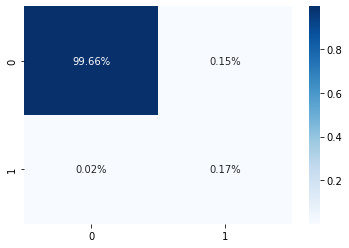

In [41]:
cm_smt_wo_outliers = confusion_matrix(y_test_smt_wo_outliers, y_pred_smt_wo_outliers) 

sns.heatmap(cm_smt_wo_outliers/np.sum(cm_smt_wo_outliers), annot=True, 
            fmt='.2%', cmap='Blues')

In [42]:
total_cost(cm_smt_wo_outliers, X_test_smt_wo_outliers, y_test_smt_wo_outliers, y_pred_smt_wo_outliers)

TP: 87, FN: 11, FP: 78, TN: 51179
Total cost: 2038.6899999999998


In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def my_scorer_smt_wo_outliers(y_true, y_pred):
    model_cm = confusion_matrix(y_true, y_pred) 
    
    for cls in range(model_cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, model_cm).ravel() 
        
    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])
    X_test_score = X_smt_wo_outliers
    # X_test_score = get_x_elements_by_indices(X_test_score, y_true.index)
    #print(labels[y_true * 2 + y_pred])
    #X_test_score['case'] = labels[y_true * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegativeMyScorer(X_test_score, y_true, y_pred) + (FP + TP) * Ca
    print(TotalCost)
    return TotalCost

my_func_smt_wo_outliers = make_scorer(my_scorer_smt_wo_outliers, greater_is_better=False)

In [37]:
grid_imba_wo_outliers = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring=my_func_smt_wo_outliers,  verbose=10)
grid_search_imba_wo_outliers = grid_imba_wo_outliers.fit(X_train, y_train);

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5; 1/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12440.213789929732
[CV 1/5; 1/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12440.214 total time=  19.1s
[CV 2/5; 1/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12784.381719410661
[CV 2/5; 1/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12784.382 total time=  19.7s
[CV 3/5; 1/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16286.696590348378
[CV 3/5; 1/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-16286.697 total time=  19.7s
[CV 4/5; 1/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15194.304589955143
[CV 4/5; 1/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15194.305 total time=  18.7s
[CV 5/5; 1/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17972.7
[CV 5/5; 1/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17972.700 total time=  18.7s
[CV 1/5; 2/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19540.213789929734
[CV 1/5; 2/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19540.214 total time=   2.9s
[CV 2/5; 2/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16369.381719410661
[CV 2/5; 2/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16369.382 total time=   2.6s
[CV 3/5; 2/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32552.916590348377
[CV 3/5; 2/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32552.917 total time=   1.9s
[CV 4/5; 2/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29471.614589955145
[CV 4/5; 2/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29471.615 total time=   1.8s
[CV 5/5; 2/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
26543.46
[CV 5/5; 2/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-26543.460 total time=   2.4s
[CV 1/5; 3/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 3/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 2/5; 3/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 3/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 3/5; 3/192] STA

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16914.213789929734
[CV 1/5; 7/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16914.214 total time=  20.8s
[CV 2/5; 7/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
18919.40171941066
[CV 2/5; 7/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-18919.402 total time=  21.6s
[CV 3/5; 7/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


No of FN: 8
22217.64659034838
[CV 3/5; 7/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-22217.647 total time=  19.3s
[CV 4/5; 7/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


No of FN: 4
19374.304589955143
[CV 4/5; 7/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-19374.305 total time=  18.6s
[CV 5/5; 7/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
22757.7
[CV 5/5; 7/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-22757.700 total time=  20.4s
[CV 1/5; 8/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 8
21708.33149042004
[CV 1/5; 8/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-21708.331 total time=   2.2s
[CV 2/5; 8/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
24729.40171941066
[CV 2/5; 8/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, scor

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
22190.213789929734
[CV 1/5; 13/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-22190.214 total time=  19.4s
[CV 2/5; 13/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24717.285354843327
[CV 2/5; 13/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-24717.285 total time=  23.0s
[CV 3/5; 13/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28966.29659034838
[CV 3/5; 13/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28966.297 total time=  23.2s
[CV 4/5; 13/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27617.044589955145
[CV 4/5; 13/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27617.045 total time=  23.8s
[CV 5/5; 13/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 13/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  24.0s
[CV 1/5; 14/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42327.33149042004
[CV 1/5; 14/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42327.331 total time=   2.2s
[CV 2/5; 14/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46004.41171941066
[CV 2/5; 14/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46004.412 total time=   2.6s
[CV 3/5; 14/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53045.82659034838
[CV 3/5; 14/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53045.827 total time=   2.3s
[CV 4/5; 14/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34387.62458995514
[CV 4/5; 14/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34387.625 total time=   3.2s
[CV 5/5; 14/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 14/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.7s
[CV 1/5; 15/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 15/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 15/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 15/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 15/192] 

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


No of FN: 5
47906.553789929734
[CV 1/5; 19/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-47906.554 total time=  26.4s
[CV 2/5; 19/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
49387.315354843326
[CV 2/5; 19/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-49387.315 total time=  25.3s
[CV 3/5; 19/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


No of FN: 2
57322.51659034838
[CV 3/5; 19/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-57322.517 total time=  23.1s
[CV 4/5; 19/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


No of FN: 1
54761.378331230204
[CV 4/5; 19/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-54761.378 total time=  26.1s
[CV 5/5; 19/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
66500
[CV 5/5; 19/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-66500.000 total time=  27.8s
[CV 1/5; 20/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
52167.64378992973
[CV 1/5; 20/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-52167.644 total time=   2.7s
[CV 2/5; 20/192] START logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 3
51622.315354843326
[CV 2/5; 20/192] END logisticregression__C=1e-05, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, 

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12440.213789929732
[CV 1/5; 25/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12440.214 total time=  23.6s
[CV 2/5; 25/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12784.381719410661
[CV 2/5; 25/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12784.382 total time=  24.4s
[CV 3/5; 25/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16286.696590348378
[CV 3/5; 25/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-16286.697 total time=  25.0s
[CV 4/5; 25/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15194.304589955143
[CV 4/5; 25/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15194.305 total time=  23.2s
[CV 5/5; 25/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17972.7
[CV 5/5; 25/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17972.700 total time=  24.0s
[CV 1/5; 26/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19540.213789929734
[CV 1/5; 26/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19540.214 total time=   3.3s
[CV 2/5; 26/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16369.381719410661
[CV 2/5; 26/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16369.382 total time=   3.1s
[CV 3/5; 26/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32552.916590348377
[CV 3/5; 26/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32552.917 total time=   2.3s
[CV 4/5; 26/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29471.614589955145
[CV 4/5; 26/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29471.615 total time=   2.3s
[CV 5/5; 26/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
26543.46
[CV 5/5; 26/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-26543.460 total time=   3.0s
[CV 1/5; 27/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 27/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 27/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 27/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
14699.213789929732
[CV 1/5; 31/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-14699.214 total time=  26.7s
[CV 2/5; 31/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
16092.285354843327
[CV 2/5; 31/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16092.285 total time=  27.4s
[CV 3/5; 31/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
19217.64659034838
[CV 3/5; 31/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-19217.647 total time=  27.0s
[CV 4/5; 31/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
17189.304589955143
[CV 4/5; 31/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17189.305 total time=  27.1s
[CV 5/5; 31/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
20247.7
[CV 5/5; 31/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-20247.700 total time=  28.1s
[CV 1/5; 32/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 8
25273.33149042004
[CV 1/5; 32/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-25273.331 total time=   2.1s
[CV 2/5; 32/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 8
26078.341168944207
[CV 2/5; 32/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=l

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
22190.213789929734
[CV 1/5; 37/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-22190.214 total time=  24.0s
[CV 2/5; 37/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24717.285354843327
[CV 2/5; 37/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-24717.285 total time=  24.9s
[CV 3/5; 37/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28966.29659034838
[CV 3/5; 37/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28966.297 total time=  26.8s
[CV 4/5; 37/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27617.044589955145
[CV 4/5; 37/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27617.045 total time=  24.5s
[CV 5/5; 37/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 37/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  23.1s
[CV 1/5; 38/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42327.33149042004
[CV 1/5; 38/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42327.331 total time=   2.3s
[CV 2/5; 38/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46004.41171941066
[CV 2/5; 38/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46004.412 total time=   2.3s
[CV 3/5; 38/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53045.82659034838
[CV 3/5; 38/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53045.827 total time=   2.2s
[CV 4/5; 38/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34387.62458995514
[CV 4/5; 38/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34387.625 total time=   3.2s
[CV 5/5; 38/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 38/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.8s
[CV 1/5; 39/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 39/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 39/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 39/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 39/

C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
28744.213789929734
[CV 1/5; 43/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-28744.214 total time=  26.0s
[CV 2/5; 43/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
31272.315354843326
[CV 2/5; 43/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-31272.315 total time=  25.4s
[CV 3/5; 43/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
35127.356590348376
[CV 3/5; 43/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-35127.357 total time=  26.4s
[CV 4/5; 43/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
33423.05458995514
[CV 4/5; 43/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-33423.055 total time=  25.7s
[CV 5/5; 43/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
40415
[CV 5/5; 43/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-40415.000 total time=  25.0s
[CV 1/5; 44/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
45417.33149042004
[CV 1/5; 44/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-45417.331 total time=   2.0s
[CV 2/5; 44/192] START logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 3
49156.09636456733
[CV 2/5; 44/192] END logisticregression__C=0.0001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfg

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12440.213789929732
[CV 1/5; 49/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12440.214 total time=  22.8s
[CV 2/5; 49/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12784.381719410661
[CV 2/5; 49/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12784.382 total time=  23.4s
[CV 3/5; 49/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16286.696590348378
[CV 3/5; 49/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-16286.697 total time=  23.7s
[CV 4/5; 49/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15194.304589955143
[CV 4/5; 49/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15194.305 total time=  22.2s
[CV 5/5; 49/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17972.7
[CV 5/5; 49/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17972.700 total time=  23.0s
[CV 1/5; 50/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19540.213789929734
[CV 1/5; 50/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19540.214 total time=   3.2s
[CV 2/5; 50/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16369.381719410661
[CV 2/5; 50/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16369.382 total time=   3.1s
[CV 3/5; 50/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32552.916590348377
[CV 3/5; 50/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32552.917 total time=   2.3s
[CV 4/5; 50/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29471.614589955145
[CV 4/5; 50/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29471.615 total time=   2.2s
[CV 5/5; 50/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
26543.46
[CV 5/5; 50/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-26543.460 total time=   2.9s
[CV 1/5; 51/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 51/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 2/5; 51/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 51/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 51/19

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
13400.213789929732
[CV 1/5; 55/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-13400.214 total time=  24.9s
[CV 2/5; 55/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
13939.381719410661
[CV 2/5; 55/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-13939.382 total time=  25.1s
[CV 3/5; 55/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
17656.69659034838
[CV 3/5; 55/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17656.697 total time=  25.9s
[CV 4/5; 55/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
15869.304589955143
[CV 4/5; 55/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-15869.305 total time=  25.6s
[CV 5/5; 55/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
18832.7
[CV 5/5; 55/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-18832.700 total time=  26.3s
[CV 1/5; 56/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 8
26418.33149042004
[CV 1/5; 56/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-26418.331 total time=   2.1s
[CV 2/5; 56/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 6
16519.38171941066
[CV 2/5; 56/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-16519.382 total time=   3.5s
[CV 3/5; 56/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 6
32233.90659034838
[CV 3/5; 56/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-32233.907 total time=   2.3s
[CV 4/5; 56/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 5
16681.644589955144
[CV 4/5; 56/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-16681.645 total time=   3.4s
[CV 5/5; 56/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 3
32297.7
[CV 5/5; 56/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-32297.700 total time=   2.2s
[CV 1/5; 57/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear
No of FN: 0
226495
[CV 1/5; 57/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
22190.213789929734
[CV 1/5; 61/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-22190.214 total time=  24.4s
[CV 2/5; 61/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24717.285354843327
[CV 2/5; 61/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-24717.285 total time=  24.4s
[CV 3/5; 61/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28966.29659034838
[CV 3/5; 61/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28966.297 total time=  24.5s
[CV 4/5; 61/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27617.044589955145
[CV 4/5; 61/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27617.045 total time=  24.7s
[CV 5/5; 61/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 61/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  23.9s
[CV 1/5; 62/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42327.33149042004
[CV 1/5; 62/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42327.331 total time=   2.2s
[CV 2/5; 62/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46004.41171941066
[CV 2/5; 62/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46004.412 total time=   2.2s
[CV 3/5; 62/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53045.82659034838
[CV 3/5; 62/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53045.827 total time=   2.4s
[CV 4/5; 62/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34387.62458995514
[CV 4/5; 62/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34387.625 total time=   3.3s
[CV 5/5; 62/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 62/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.9s
[CV 1/5; 63/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 63/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 63/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 63/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 63/192] 

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
23765.213789929734
[CV 1/5; 67/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-23765.214 total time=  25.1s
[CV 2/5; 67/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
26747.295354843325
[CV 2/5; 67/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-26747.295 total time=  26.4s
[CV 3/5; 67/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
31252.35659034838
[CV 3/5; 67/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-31252.357 total time=  25.1s
[CV 4/5; 67/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
29082.044589955145
[CV 4/5; 67/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-29082.045 total time=  25.7s
[CV 5/5; 67/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
35275
[CV 5/5; 67/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-35275.000 total time=  26.2s
[CV 1/5; 68/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
35789.61378992973
[CV 1/5; 68/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-35789.614 total time=   3.2s
[CV 2/5; 68/192] START logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46259.41171941066
[CV 2/5; 68/192] END logisticregression__C=0.001, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, s

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12440.213789929732
[CV 1/5; 73/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12440.214 total time=  25.1s
[CV 2/5; 73/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12784.381719410661
[CV 2/5; 73/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12784.382 total time=  26.4s
[CV 3/5; 73/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16286.696590348378
[CV 3/5; 73/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-16286.697 total time=  27.0s
[CV 4/5; 73/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15194.304589955143
[CV 4/5; 73/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15194.305 total time=  25.2s
[CV 5/5; 73/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17972.7
[CV 5/5; 73/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17972.700 total time=  25.8s
[CV 1/5; 74/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19540.213789929734
[CV 1/5; 74/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19540.214 total time=   3.6s
[CV 2/5; 74/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16369.381719410661
[CV 2/5; 74/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16369.382 total time=   3.6s
[CV 3/5; 74/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32552.916590348377
[CV 3/5; 74/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32552.917 total time=   2.5s
[CV 4/5; 74/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29471.614589955145
[CV 4/5; 74/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29471.615 total time=   2.3s
[CV 5/5; 74/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
26543.46
[CV 5/5; 74/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-26543.460 total time=   3.1s
[CV 1/5; 75/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 75/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 75/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 75/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 75/192] ST

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
13075.213789929732
[CV 1/5; 79/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-13075.214 total time=  26.0s
[CV 2/5; 79/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12829.381719410661
[CV 2/5; 79/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12829.382 total time=  27.3s
[CV 3/5; 79/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16961.69659034838
[CV 3/5; 79/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16961.697 total time=  25.9s
[CV 4/5; 79/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15139.304589955143
[CV 4/5; 79/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-15139.305 total time=  25.0s
[CV 5/5; 79/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
18352.7
[CV 5/5; 79/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-18352.700 total time=  25.7s
[CV 1/5; 80/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
17120.213789929734
[CV 1/5; 80/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-17120.214 total time=   3.3s
[CV 2/5; 80/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
21769.40171941066
[CV 2/5; 80/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-21769.402 total time=   2.7s
[CV 3/5; 80/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
32497.916590348377
[CV 3/5; 80/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfg

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 0
20830
[CV 5/5; 80/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-20830.000 total time=   3.4s
[CV 1/5; 81/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear
No of FN: 0
226495
[CV 1/5; 81/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=-226495.000 total time=   2.9s
[CV 2/5; 81/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear
No of FN: 0
226510
[CV 2/5; 81/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=-226510.0

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
22190.213789929734
[CV 1/5; 85/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-22190.214 total time=  24.4s
[CV 2/5; 85/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24717.285354843327
[CV 2/5; 85/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-24717.285 total time=  24.0s
[CV 3/5; 85/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28966.29659034838
[CV 3/5; 85/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28966.297 total time=  25.1s
[CV 4/5; 85/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27617.044589955145
[CV 4/5; 85/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27617.045 total time=  24.5s
[CV 5/5; 85/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 85/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  23.8s
[CV 1/5; 86/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42327.33149042004
[CV 1/5; 86/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42327.331 total time=   2.3s
[CV 2/5; 86/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46004.41171941066
[CV 2/5; 86/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46004.412 total time=   2.2s
[CV 3/5; 86/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53045.82659034838
[CV 3/5; 86/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53045.827 total time=   2.3s
[CV 4/5; 86/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34387.62458995514
[CV 4/5; 86/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34387.625 total time=   3.4s
[CV 5/5; 86/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 86/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   3.1s
[CV 1/5; 87/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 87/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 87/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 87/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.4s
[CV 3/5; 87/192] START

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21610.213789929734
[CV 1/5; 91/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-21610.214 total time=  24.3s
[CV 2/5; 91/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24672.285354843327
[CV 2/5; 91/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-24672.285 total time=  23.8s
[CV 3/5; 91/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
29756.29659034838
[CV 3/5; 91/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-29756.297 total time=  24.3s
[CV 4/5; 91/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27572.044589955145
[CV 4/5; 91/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-27572.045 total time=  23.6s
[CV 5/5; 91/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33560
[CV 5/5; 91/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-33560.000 total time=  23.5s
[CV 1/5; 92/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
42342.33149042004
[CV 1/5; 92/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-42342.331 total time=   2.3s
[CV 2/5; 92/192] START logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46024.41171941066
[CV 2/5; 92/192] END logisticregression__C=0.01, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12440.213789929732
[CV 1/5; 97/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12440.214 total time=  24.8s
[CV 2/5; 97/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12784.381719410661
[CV 2/5; 97/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12784.382 total time=  24.6s
[CV 3/5; 97/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16286.696590348378
[CV 3/5; 97/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-16286.697 total time=  25.3s
[CV 4/5; 97/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15194.304589955143
[CV 4/5; 97/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15194.305 total time=  24.8s
[CV 5/5; 97/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17972.7
[CV 5/5; 97/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17972.700 total time=  25.0s
[CV 1/5; 98/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19540.213789929734
[CV 1/5; 98/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19540.214 total time=   3.3s
[CV 2/5; 98/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16369.381719410661
[CV 2/5; 98/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16369.382 total time=   3.4s
[CV 3/5; 98/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32552.916590348377
[CV 3/5; 98/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32552.917 total time=   2.3s
[CV 4/5; 98/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29471.614589955145
[CV 4/5; 98/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29471.615 total time=   2.3s
[CV 5/5; 98/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
26543.46
[CV 5/5; 98/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-26543.460 total time=   3.0s
[CV 1/5; 99/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 99/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 99/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 99/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 99/192] START l

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12580.213789929732
[CV 1/5; 103/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12580.214 total time=  24.3s
[CV 2/5; 103/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12919.381719410661
[CV 2/5; 103/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12919.382 total time=  25.7s
[CV 3/5; 103/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16726.69659034838
[CV 3/5; 103/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16726.697 total time=  24.4s
[CV 4/5; 103/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
14724.304589955143
[CV 4/5; 103/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-14724.305 total time=  24.7s
[CV 5/5; 103/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17832.7
[CV 5/5; 103/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17832.700 total time=  24.0s
[CV 1/5; 104/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
17470.213789929734
[CV 1/5; 104/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-17470.214 total time=   3.4s
[CV 2/5; 104/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 6
16369.381719410661
[CV 2/5; 104/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-16369.382 total time=   3.6s
[CV 3/5; 104/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
32542.916590348377
[CV 3/5; 104/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-32542.917 total time=   2.5s
[CV 4/5; 104/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
29471.614589955145
[CV 4/5; 104/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbf

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
22190.213789929734
[CV 1/5; 109/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-22190.214 total time=  23.4s
[CV 2/5; 109/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24717.285354843327
[CV 2/5; 109/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-24717.285 total time=  23.5s
[CV 3/5; 109/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28966.29659034838
[CV 3/5; 109/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28966.297 total time=  23.3s
[CV 4/5; 109/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27617.044589955145
[CV 4/5; 109/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27617.045 total time=  23.3s
[CV 5/5; 109/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 109/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  23.3s
[CV 1/5; 110/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42327.33149042004
[CV 1/5; 110/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42327.331 total time=   2.2s
[CV 2/5; 110/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46004.41171941066
[CV 2/5; 110/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46004.412 total time=   2.2s
[CV 3/5; 110/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53045.82659034838
[CV 3/5; 110/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53045.827 total time=   2.2s
[CV 4/5; 110/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34387.62458995514
[CV 4/5; 110/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34387.625 total time=   3.2s
[CV 5/5; 110/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 110/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.7s
[CV 1/5; 111/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 111/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 111/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 111/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 111/192] STAR

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21415.213789929734
[CV 1/5; 115/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-21415.214 total time=  23.8s
[CV 2/5; 115/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
26642.295354843325
[CV 2/5; 115/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-26642.295 total time=  23.9s
[CV 3/5; 115/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
27866.29659034838
[CV 3/5; 115/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-27866.297 total time=  23.9s
[CV 4/5; 115/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
26694.304589955143
[CV 4/5; 115/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-26694.305 total time=  23.9s
[CV 5/5; 115/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
32925
[CV 5/5; 115/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-32925.000 total time=  26.2s
[CV 1/5; 116/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
42332.33149042004
[CV 1/5; 116/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-42332.331 total time=   2.6s
[CV 2/5; 116/192] START logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46009.41171941066
[CV 2/5; 116/192] END logisticregression__C=0.1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12440.213789929732
[CV 1/5; 121/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12440.214 total time=  24.1s
[CV 2/5; 121/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12784.381719410661
[CV 2/5; 121/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12784.382 total time=  24.7s
[CV 3/5; 121/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16286.696590348378
[CV 3/5; 121/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-16286.697 total time=  24.4s
[CV 4/5; 121/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15194.304589955143
[CV 4/5; 121/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15194.305 total time=  24.1s
[CV 5/5; 121/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17972.7
[CV 5/5; 121/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17972.700 total time=  24.5s
[CV 1/5; 122/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19540.213789929734
[CV 1/5; 122/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19540.214 total time=   3.3s
[CV 2/5; 122/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs
No of FN: 6
16369.381719410661
[CV 2/5; 122/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16369.382 total time=   3.2s
[CV 3/5; 122/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs
No of FN: 5
32552.916590348377
[CV 3/5; 122/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbf

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12520.213789929732
[CV 1/5; 127/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12520.214 total time=  24.1s
[CV 2/5; 127/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12869.381719410661
[CV 2/5; 127/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12869.382 total time=  24.3s
[CV 3/5; 127/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
17151.69659034838
[CV 3/5; 127/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17151.697 total time=  24.4s
[CV 4/5; 127/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
14684.304589955143
[CV 4/5; 127/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-14684.305 total time=  24.5s
[CV 5/5; 127/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17902.7
[CV 5/5; 127/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17902.700 total time=  23.8s
[CV 1/5; 128/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 9
18538.11149042004
[CV 1/5; 128/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-18538.111 total time=   2.7s
[CV 2/5; 128/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 6
16209.381719410661
[CV 2/5; 128/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-16209.382 total time=   3.4s
[CV 3/5; 128/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
32547.916590348377
[CV 3/5; 128/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-32547.917 total time=   2.4s
[CV 4/5; 128/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
29471.614589955145
[CV 4/5; 128/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
22190.213789929734
[CV 1/5; 133/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-22190.214 total time=  23.1s
[CV 2/5; 133/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24717.285354843327
[CV 2/5; 133/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-24717.285 total time=  23.0s
[CV 3/5; 133/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28966.29659034838
[CV 3/5; 133/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28966.297 total time=  23.1s
[CV 4/5; 133/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27617.044589955145
[CV 4/5; 133/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27617.045 total time=  24.6s
[CV 5/5; 133/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 133/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  23.0s
[CV 1/5; 134/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs
No of FN: 7
42327.33149042004
[CV 1/5; 134/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42327.331 total time=   2.2s
[CV 2/5; 134/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs
No of FN: 4
46004.41171941066
[CV 2/5; 134/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21535.213789929734
[CV 1/5; 139/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-21535.214 total time=  23.3s
[CV 2/5; 139/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24692.285354843327
[CV 2/5; 139/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-24692.285 total time=  23.9s
[CV 3/5; 139/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28356.29659034838
[CV 3/5; 139/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-28356.297 total time=  23.5s
[CV 4/5; 139/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
26394.304589955143
[CV 4/5; 139/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-26394.305 total time=  23.8s
[CV 5/5; 139/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33910
[CV 5/5; 139/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-33910.000 total time=  24.1s
[CV 1/5; 140/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
42327.33149042004
[CV 1/5; 140/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-42327.331 total time=   2.2s
[CV 2/5; 140/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46004.41171941066
[CV 2/5; 140/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-46004.412

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 0
37390
[CV 5/5; 140/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-37390.000 total time=   3.4s
[CV 1/5; 141/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear
No of FN: 0
227435
[CV 1/5; 141/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=-227435.000 total time=   2.9s
[CV 2/5; 141/192] START logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear
No of FN: 0
227080
[CV 2/5; 141/192] END logisticregression__C=1, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=-227080.000 total t

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12440.213789929732
[CV 1/5; 145/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12440.214 total time=  24.1s
[CV 2/5; 145/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12784.381719410661
[CV 2/5; 145/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12784.382 total time=  24.9s
[CV 3/5; 145/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16286.696590348378
[CV 3/5; 145/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-16286.697 total time=  25.0s
[CV 4/5; 145/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15194.304589955143
[CV 4/5; 145/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15194.305 total time=  24.1s
[CV 5/5; 145/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17972.7
[CV 5/5; 145/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17972.700 total time=  26.1s
[CV 1/5; 146/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19540.213789929734
[CV 1/5; 146/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19540.214 total time=   3.6s
[CV 2/5; 146/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16369.381719410661
[CV 2/5; 146/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16369.382 total time=   3.2s
[CV 3/5; 146/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32552.916590348377
[CV 3/5; 146/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32552.917 total time=   2.4s
[CV 4/5; 146/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29471.614589955145
[CV 4/5; 146/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29471.615 total time=   2.2s
[CV 5/5; 146/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
26543.46
[CV 5/5; 146/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-26543.460 total time=   2.9s
[CV 1/5; 147/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 147/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 147/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 147/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 147/192] START 

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12300.213789929732
[CV 1/5; 151/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12300.214 total time=  25.6s
[CV 2/5; 151/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12484.381719410661
[CV 2/5; 151/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12484.382 total time=  25.0s
[CV 3/5; 151/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16531.69659034838
[CV 3/5; 151/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16531.697 total time=  23.9s
[CV 4/5; 151/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15174.304589955143
[CV 4/5; 151/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-15174.305 total time=  23.5s
[CV 5/5; 151/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17727.7
[CV 5/5; 151/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17727.700 total time=  24.6s
[CV 1/5; 152/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 9
18538.11149042004
[CV 1/5; 152/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-18538.111 total time=   2.8s
[CV 2/5; 152/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 6
16369.381719410661
[CV 2/5; 152/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-1

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
22190.213789929734
[CV 1/5; 157/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-22190.214 total time=  23.2s
[CV 2/5; 157/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24717.285354843327
[CV 2/5; 157/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-24717.285 total time=  23.2s
[CV 3/5; 157/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28966.29659034838
[CV 3/5; 157/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28966.297 total time=  24.3s
[CV 4/5; 157/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27617.044589955145
[CV 4/5; 157/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27617.045 total time=  25.5s
[CV 5/5; 157/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 157/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  23.3s
[CV 1/5; 158/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42327.33149042004
[CV 1/5; 158/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42327.331 total time=   2.3s
[CV 2/5; 158/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46004.41171941066
[CV 2/5; 158/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46004.412 total time=   2.3s
[CV 3/5; 158/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53045.82659034838
[CV 3/5; 158/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53045.827 total time=   2.3s
[CV 4/5; 158/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34387.62458995514
[CV 4/5; 158/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34387.625 total time=   3.3s
[CV 5/5; 158/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 158/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.7s
[CV 1/5; 159/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 159/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 159/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 159/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 159/192] START log

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
21950.213789929734
[CV 1/5; 163/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-21950.214 total time=  26.3s
[CV 2/5; 163/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
23492.285354843327
[CV 2/5; 163/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-23492.285 total time=  24.2s
[CV 3/5; 163/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28036.29659034838
[CV 3/5; 163/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-28036.297 total time=  24.8s
[CV 4/5; 163/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
26987.044589955145
[CV 4/5; 163/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-26987.045 total time=  23.6s
[CV 5/5; 163/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33235
[CV 5/5; 163/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-33235.000 total time=  23.9s
[CV 1/5; 164/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
42327.33149042004
[CV 1/5; 164/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-42327.331 total time=   2.3s
[CV 2/5; 164/192] START logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46004.41171941066
[CV 2/5; 164/192] END logisticregression__C=10, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-4600

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12440.213789929732
[CV 1/5; 169/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12440.214 total time=  23.8s
[CV 2/5; 169/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12784.381719410661
[CV 2/5; 169/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-12784.382 total time=  24.4s
[CV 3/5; 169/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16286.696590348378
[CV 3/5; 169/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-16286.697 total time=  24.7s
[CV 4/5; 169/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
15194.304589955143
[CV 4/5; 169/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-15194.305 total time=  23.6s
[CV 5/5; 169/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17972.7
[CV 5/5; 169/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-17972.700 total time=  24.3s
[CV 1/5; 170/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 8
19540.213789929734
[CV 1/5; 170/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-19540.214 total time=   3.3s
[CV 2/5; 170/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 6
16369.381719410661
[CV 2/5; 170/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-16369.382 total time=   3.2s
[CV 3/5; 170/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
32552.916590348377
[CV 3/5; 170/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-32552.917 total time=   2.3s
[CV 4/5; 170/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 5
29471.614589955145
[CV 4/5; 170/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-29471.615 total time=   2.2s
[CV 5/5; 170/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 2
26543.46
[CV 5/5; 170/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-26543.460 total time=   2.9s
[CV 1/5; 171/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 171/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 2/5; 171/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 171/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.3s
[CV 3/5; 171/192] S

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
12745.213789929732
[CV 1/5; 175/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12745.214 total time=  17.4s
[CV 2/5; 175/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 6
12704.381719410661
[CV 2/5; 175/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-12704.382 total time=  18.5s
[CV 3/5; 175/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 7
16386.69659034838
[CV 3/5; 175/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-16386.697 total time=  18.2s
[CV 4/5; 175/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
14494.304589955143
[CV 4/5; 175/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-14494.305 total time=  18.0s
[CV 5/5; 175/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 2
17917.7
[CV 5/5; 175/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-17917.700 total time=  18.2s
[CV 1/5; 176/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 7
16734.213789929734
[CV 1/5; 176/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-16734.214 total time=   2.5s
[CV 2/5; 176/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No of FN: 6
16579.38171941066
[CV 2/5; 176/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-16579.382 total time=   2.7s
[CV 3/5; 176/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
32552.916590348377
[CV 3/5; 176/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-32552.917 total time=   1.8s
[CV 4/5; 176/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 5
29471.614589955145
[CV 4/5; 176/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 10.0}, logisticregression__penalty=l2, logisticregression__solver=lbfg

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
22190.213789929734
[CV 1/5; 181/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-22190.214 total time=  17.3s
[CV 2/5; 181/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
24717.285354843327
[CV 2/5; 181/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-24717.285 total time=  17.2s
[CV 3/5; 181/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 4
28966.29659034838
[CV 3/5; 181/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-28966.297 total time=  17.4s
[CV 4/5; 181/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27617.044589955145
[CV 4/5; 181/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-27617.045 total time=  17.4s
[CV 5/5; 181/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33455
[CV 5/5; 181/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=newton-cg;, score=-33455.000 total time=  17.1s
[CV 1/5; 182/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 7
42327.33149042004
[CV 1/5; 182/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-42327.331 total time=   1.7s
[CV 2/5; 182/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
46004.41171941066
[CV 2/5; 182/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-46004.412 total time=   1.7s
[CV 3/5; 182/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
53045.82659034838
[CV 3/5; 182/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-53045.827 total time=   1.7s
[CV 4/5; 182/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 4
34387.62458995514
[CV 4/5; 182/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-34387.625 total time=   2.4s
[CV 5/5; 182/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


No of FN: 0
49900
[CV 5/5; 182/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=lbfgs;, score=-49900.000 total time=   2.0s
[CV 1/5; 183/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 1/5; 183/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 2/5; 183/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear
[CV 2/5; 183/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=none, logisticregression__solver=liblinear;, score=nan total time=   0.2s
[CV 3/5; 183/192] STAR

C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 8
22640.213789929734
[CV 1/5; 187/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-22640.214 total time=  17.5s
[CV 2/5; 187/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
23447.285354843327
[CV 2/5; 187/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-23447.285 total time=  18.3s
[CV 3/5; 187/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 5
29992.35659034838
[CV 3/5; 187/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-29992.357 total time=  18.2s
[CV 4/5; 187/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 3
27987.044589955145
[CV 4/5; 187/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-27987.045 total time=  18.2s
[CV 5/5; 187/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg


C:\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


No of FN: 0
33095
[CV 5/5; 187/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=-33095.000 total time=  18.3s
[CV 1/5; 188/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 7
42327.33149042004
[CV 1/5; 188/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=-42327.331 total time=   1.8s
[CV 2/5; 188/192] START logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs
No of FN: 4
46004.41171941066
[CV 2/5; 188/192] END logisticregression__C=100, logisticregression__class_weight={0: 1.0, 1: 25.0}, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=

C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\imblearn\pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python310\lib\site-pac

In [38]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_search_imba_wo_outliers.cv_results_['mean_test_score'], grid_search_imba_wo_outliers.best_params_))
results_df_imba_wo_outliers = pd.DataFrame(grid_search_imba_wo_outliers.cv_results_)
results_df_imba_wo_outliers

Best: [ -14935.65933793  -24895.51733793              nan              nan
              nan  -56121.90685194  -20036.65333793  -27783.13287803
 -226832.                      nan              nan              nan
  -27389.16806502  -45133.03887803              nan              nan
              nan -101738.09931807  -55175.55281327  -57799.49514702
 -227237.                      nan              nan              nan
  -14935.65933793  -24895.51733793              nan              nan
              nan  -24564.22333793  -17489.23006502  -28212.13076793
 -226831.                      nan              nan              nan
  -27389.16806502  -45133.03887803              nan              nan
              nan  -42424.94081327  -33796.38806502  -48464.65814081
 -227237.                      nan              nan              nan
  -14935.65933793  -24895.51733793              nan              nan
              nan  -16604.70806502  -15939.65933793  -24830.19287803
 -226831.                   

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        19.239008      0.455604         0.021799        0.000982   
1         2.371387      0.417453         0.020821        0.000396   
2         0.291005      0.007483         0.000000        0.000000   
3         0.289000      0.010412         0.000000        0.000000   
4         0.292998      0.009864         0.000000        0.000000   
..             ...           ...              ...             ...   
187       2.036799      0.275182         0.020595        0.000499   
188       2.105612      0.228460         0.016600        0.000491   
189       0.276800      0.002933         0.000000        0.000000   
190       0.271193      0.002931         0.000000        0.000000   
191       0.269387      0.004801         0.000000        0.000000   

    param_logisticregression__C param_logisticregression__class_weight  \
0                       0.00001                      {0: 1.0, 1: 10.0}   
1                       0.00001                      {0: 1.0, 1: 10.0}   
2                       0.00001                      {0: 1.0, 1: 10.0}   
3                       0.00001                      {0: 1.0, 1: 10.0}   
4                       0.00001                      {0: 1.0, 1: 10.0}   
..                          ...                                    ...   
187                         100                      {0: 1.0, 1: 25.0}   
188                         100                      {0: 1.0, 1: 25.0}   
189                         100                      {0: 1.0, 1: 25.0}   
190                         100                      {0: 1.0, 1: 25.0}   
191                         100                      {0: 1.0, 1: 25.0}   

    param_logisticregression__penalty param_logisticregression__solver  \
0                                none                        newton-cg   
1                                none                            lbfgs   
2                                none                        liblinear   
3                                  l1                        newton-cg   
4                                  l1                            lbfgs   
..                                ...                              ...   
187                                l2                            lbfgs   
188                                l2                        liblinear   
189                        elasticnet                        newton-cg   
190                        elasticnet                            lbfgs   
191                        elasticnet                        liblinear   

                                                params  split0_test_score  \
0    {'logisticregression__C': 1e-05, 'logisticregr...       -12440.21379   
1    {'logisticregression__C': 1e-05, 'logisticregr...       -19540.21379   
2    {'logisticregression__C': 1e-05, 'logisticregr...                NaN   
3    {'logisticregression__C': 1e-05, 'logisticregr...                NaN   
4    {'logisticregression__C': 1e-05, 'logisticregr...                NaN   
..                                                 ...                ...   
187  {'logisticregression__C': 100, 'logisticregres...       -42327.33149   
188  {'logisticregression__C': 100, 'logisticregres...      -227435.00000   
189  {'logisticregression__C': 100, 'logisticregres...                NaN   
190  {'logisticregression__C': 100, 'logisticregres...                NaN   
191  {'logisticregression__C': 100, 'logisticregres...                NaN   

     split1_test_score  split2_test_score  split3_test_score  \
0        -12784.381719       -16286.69659       -15194.30459   
1        -16369.381719       -32552.91659       -29471.61459   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
187      -46004.411719   